#**MVP Análise de Dados e Boas Práticas**



##**Introdução**

* **Definição e Descrição do Problema:**

Este trabalho explora dados históricos de geração de energia de fontes renováveis como: eólica, solar, hidroelétrica e outras de diversos países.
Serão analisado cenários onde terão comparações entre fontes de energia renovável entre países, expansão da geração de energia renovável ao longo dos anos, entendimento da matriz energética de alguns países e identificação de padrões regionais na produção de energia renovável.

* **Premissas e Hipóteses**:

Os dados históricos de geração de energia renovável podem mostrar como os países estão utilizando diferentes fontes de energia renovável em sua matriz energética, auxiliar na identificação de oportunidades para melhoria ou expansão de uma determinada fonte de energia e até promover benchmarking entre países a fim de promover incentivos a adoção de fontes de energia renováveis para suprir o mercado interno.

* **Restrições e Condições dos Dados:**

Os dados possuem informações de diversos países desde 1965 até 2022 e foram selecionados com base na relevância da emergência climática e transição energética dos países.

* **Definição dos Atributos do Dataset:**


> *Entity*: Refere-se ao país ou região para os quais os dados de energia renovável são reportados.

> *Code*: Um código de três letras atribuído a cada país ou região no conjunto de dados.

> *Year*: O ano para o qual os dados de energia renovável são reportados.

> *Eletricidade vinda do vento:* quantidade em TWh produzida de energia eólica

> *Eletricidade vinda de hidroelétrica:* quantidade em TWh produzida de energia hidroelétrica

> *Eletricidade vinda do sol:* quantidade em TWh produzida de energia solar

> *Eletricidade vinda de outras fontes incluindo biomassa:* quantidade em TWh produzida de outras fontes incluindo biomassa

##**Análise dos Dados**

Importação de Bibliotecas:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



Carregamento do dataset

In [3]:
file_path = 'https://raw.githubusercontent.com/kkkk-8548/mvp_data_analysis/main/03%20modern-renewable-prod.csv'
df = pd.read_csv(file_path, sep = ',', encoding='ISO-8859-1')

df.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [4]:
file_path_dimension_dataset = 'https://raw.githubusercontent.com/kkkk-8548/mvp_data_analysis/refs/heads/main/Countries-Continents.csv'
df_continent_countries = pd.read_csv(file_path_dimension_dataset, sep = ',', encoding='ISO-8859-1')

df_continent_countries.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


### **Análise Exploratória de Dados**

> Tabela Fato: referente a tabela que contém os dados de geração de energia renovável (df), que tem os dados quantitativos sobre esses eventose e chaves estrangeiras que referencia a tabela de dimensão.

Estatísticas Descritiva:




In [5]:
## verificando o tamanho da tabela fato, que é a tabela com dados de geração de energia renovável
df_columns = df.shape[1]
df_data = df.shape[0]

print("Número de colunas:", df_columns)
print("Número de linhas:", df_data)

Número de colunas: 7
Número de linhas: 8851


In [6]:
## tipos de dados das colunas
df.dtypes


,0
Entity,object
Code,object
Year,int64
Electricity from wind (TWh),float64
Electricity from hydro (TWh),float64
Electricity from solar (TWh),float64
Other renewables including bioenergy (TWh),float64


Os tipos dos dados estão corretos então não será necessário ajuste

In [7]:
##visualizando as primeiras linhas
df.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [8]:
## visualizando as últimas linhas
df.tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.0,3.97,0.01,0.32
8847,Zimbabwe,ZWE,2018,0.0,5.05,0.02,0.39
8848,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.38
8849,Zimbabwe,ZWE,2020,0.0,3.81,0.03,0.35
8850,Zimbabwe,ZWE,2021,0.0,4.00,0.04,0.38


Todas as colunas serão utilizadas então nenhuma será excluída


In [9]:
df.describe().round(2)

,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
count,8851.00,8676.00,8840.00,8683.00,8631.00
mean,1999.91,14.57,116.58,5.28,12.24
std,15.75,86.39,360.23,40.10,48.35
min,1965.00,0.00,0.00,0.00,0.00
25%,1988.00,0.00,0.09,0.00,0.00
50%,2004.00,0.00,3.53,0.00,0.02
75%,2013.00,0.06,30.07,0.01,1.61
max,2022.00,1848.26,4340.61,1040.50,761.93


Algumas observações sobre o resumo estatístico:

* **Count**(contagem): são 8851 linhas nesse dataset, como a contagem nas colunas são diferentes, nota-se que há valores nulos, o que será avaliado a seguir.
* **Mean** (média): a maior média de geração de energia renovável é a hidrelétrica
* **Std** (desvio padrão): Os valores altos de desvio padrão indicam que há uma grande variação de geração de energia renovável ao longo dos anos nos países listados nesse dataset, indicando evolução e incentivo nesse tipo de energia.
* **Min** (mínimo): pela coluna 'Year', é possível verificar que o dado mais antigo que tem disponível nesse dataset é 1965 e que há períodos de tempo onde não teve geração de energia renovável.
* **Quartis** (25%, 50%, 75%): Os quartis mostram a distribuição dos dados, com 25% dos valores abaixo do primeiro quartil, 50% (mediana) abaixo do segundo quartil e 75% abaixo do terceiro quartil.
* **Max**(máximo): é possível verificar o pico de geração de energia hidrelétrica com 4.440,61 TWh

In [10]:
## verificando se há valores faltantes
df.isnull().sum()

,0
Entity,0
Code,1555
Year,0
Electricity from wind (TWh),175
Electricity from hydro (TWh),11
Electricity from solar (TWh),168
Other renewables including bioenergy (TWh),220


In [11]:
#valores distintos no atributo 'Entity' para verificar quais países estão listados nesse dataset
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (BP)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (BP)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa (BP)', 'Ecuador', 'Egypt

In [12]:
#alterando o nome da coluna 'Entity' para 'Country'
df.rename(columns={'Entity': 'Country'}, inplace=True)
df.head()

,Country,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


Incluindo os dados da tabela dimensão (df_continent_countries) para incluir o continentes dos países

In [13]:
#unindo os datasets
merged_df = pd.merge(df, df_continent_countries, how= 'left', on='Country')
merged_df.head()

,Country,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0,Asia
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0,Asia
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0,Asia
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0,Asia
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0,Asia


In [14]:
merged_df['Continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [15]:
#filtrando a linha onde o país é "World"
world_row = merged_df.loc[df['Country'] == 'World']

#exibindo a linha correspondente
print(world_row)

     Country      Code  Year  Electricity from wind (TWh)  \
8728   World  OWID_WRL  1965                     0.000000   
8729   World  OWID_WRL  1966                     0.000000   
8730   World  OWID_WRL  1967                     0.000000   
8731   World  OWID_WRL  1968                     0.000000   
8732   World  OWID_WRL  1969                     0.000000   
8733   World  OWID_WRL  1970                     0.000000   
8734   World  OWID_WRL  1971                     0.000000   
8735   World  OWID_WRL  1972                     0.000000   
8736   World  OWID_WRL  1973                     0.000000   
8737   World  OWID_WRL  1974                     0.000000   
8738   World  OWID_WRL  1975                     0.000000   
8739   World  OWID_WRL  1976                     0.000000   
8740   World  OWID_WRL  1977                     0.000000   
8741   World  OWID_WRL  1978                     0.003000   
8742   World  OWID_WRL  1979                     0.006000   
8743   World  OWID_WRL  

Como a coluna 'Country' não se refere apenas a países mas também a regiões, será necessário classificar esses dados na coluna 'Continent'

In [16]:
#analisando se o dados for 'NaN' na coluna 'Continent' deverá ser substituído pelo nome da região que está disponível na coluna 'Country'
merged_df['Continent'] =merged_df['Continent'].fillna(df['Country'])



In [17]:
#filtrando a linha onde o país é "World" pra verificar se a substituição deu certo
world_row = merged_df.loc[df['Country'] == 'World']

#exibindo a linha correspondente
print(world_row)

     Country      Code  Year  Electricity from wind (TWh)  \
8728   World  OWID_WRL  1965                     0.000000   
8729   World  OWID_WRL  1966                     0.000000   
8730   World  OWID_WRL  1967                     0.000000   
8731   World  OWID_WRL  1968                     0.000000   
8732   World  OWID_WRL  1969                     0.000000   
8733   World  OWID_WRL  1970                     0.000000   
8734   World  OWID_WRL  1971                     0.000000   
8735   World  OWID_WRL  1972                     0.000000   
8736   World  OWID_WRL  1973                     0.000000   
8737   World  OWID_WRL  1974                     0.000000   
8738   World  OWID_WRL  1975                     0.000000   
8739   World  OWID_WRL  1976                     0.000000   
8740   World  OWID_WRL  1977                     0.000000   
8741   World  OWID_WRL  1978                     0.003000   
8742   World  OWID_WRL  1979                     0.006000   
8743   World  OWID_WRL  

Excluir o atributo de código:

In [18]:
df_renewable_energy = merged_df.drop(columns=['Code'])
df_renewable_energy.head()

,Country,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent
0,Afghanistan,2000,0.0,0.31,0.0,0.0,Asia
1,Afghanistan,2001,0.0,0.50,0.0,0.0,Asia
2,Afghanistan,2002,0.0,0.56,0.0,0.0,Asia
3,Afghanistan,2003,0.0,0.63,0.0,0.0,Asia
4,Afghanistan,2004,0.0,0.56,0.0,0.0,Asia


###Analisando os valores nulos do atributo 'Electricity from wind (TWh)':

In [19]:
##exibindo linhas com valores null para avaliarmos como será tratado esses campos na coluna 'Electricity from wind (TWh)'
pd.set_option('display.max_rows', None)

linhas_com_nulos_wind = df_renewable_energy[['Country','Year','Electricity from wind (TWh)']][df_renewable_energy['Electricity from wind (TWh)'].isnull()]

print(linhas_com_nulos_wind)

                             Country  Year  Electricity from wind (TWh)
696                       Azerbaijan  1985                          NaN
697                       Azerbaijan  1986                          NaN
698                       Azerbaijan  1987                          NaN
699                       Azerbaijan  1988                          NaN
700                       Azerbaijan  1989                          NaN
850                          Belarus  1985                          NaN
851                          Belarus  1986                          NaN
852                          Belarus  1987                          NaN
853                          Belarus  1988                          NaN
854                          Belarus  1989                          NaN
1303                        CIS (BP)  1966                          NaN
1304                        CIS (BP)  1967                          NaN
1305                        CIS (BP)  1968                      

Para fins de análise, os valores null da coluna 'Electricity from wind (TWh)' serão substituídos por zero visto que são dados de anos 60, 70, 80 e 90 onde a energia eólica ainda não era muito desenvolvida nos países listados, e também alguns países de pequeno território como Martinique no Caribe com dados de anos mais recentes.

In [20]:
#substituindo valores nulos por zero
df_renewable_energy['Electricity from wind (TWh)'].fillna(0, inplace=True)
df_renewable_energy['Electricity from wind (TWh)'].isnull().sum()


0

###Analisando os valores nulos do atributo 'Electricity from wind (TWh)':

In [21]:
##exibindo linhas com valores null para avaliarmos como será tratado esses campos na coluna 'Electricity from hydro (TWh)'
pd.set_option('display.max_rows', None)

linhas_com_nulos_hydro = df_renewable_energy[['Country','Year','Electricity from hydro (TWh)']][df_renewable_energy['Electricity from hydro (TWh)'].isnull()]

print(linhas_com_nulos_hydro)

           Country  Year  Electricity from hydro (TWh)
4872    Martinique  2012                           NaN
4873    Martinique  2013                           NaN
4874    Martinique  2014                           NaN
4875    Martinique  2015                           NaN
4876    Martinique  2016                           NaN
4877    Martinique  2017                           NaN
4878    Martinique  2018                           NaN
4879    Martinique  2019                           NaN
4880    Martinique  2020                           NaN
4881    Martinique  2021                           NaN
6884  Saudi Arabia  2021                           NaN


Para fins de análise, os valores null da coluna 'Electricity from hydro (TWh)' serão substituídos por zero visto que Martinique no Caribe é um país de pequeno território. Agora no caso da Arábia Saudita teremos que verificar o caso

In [22]:
#substituindo os valores nulos por zero do país Martinique

df_renewable_energy.loc[df_renewable_energy['Country'] == 'Martinique', 'Electricity from hydro (TWh)'] = df_renewable_energy.loc[df_renewable_energy['Country'] == 'Martinique', 'Electricity from hydro (TWh)'].fillna(0)
linhas_com_nulos_hydro = df_renewable_energy[['Country','Year','Electricity from hydro (TWh)']][df_renewable_energy['Electricity from hydro (TWh)'].isnull()]

print(linhas_com_nulos_hydro)

           Country  Year  Electricity from hydro (TWh)
6884  Saudi Arabia  2021                           NaN


Verificando o caso da Arábia Saudita, onde apenas 1 ano está nulo. Interessante analisar o comportamento da geração de eletricidade hídrica ao longo dos anos nesse país antes de tratarmos esse campo


In [23]:
df_renewable_energy.loc[df_renewable_energy['Country'] == 'Saudi Arabia']


,Country,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent
6828,Saudi Arabia,1965,0.0,0.0,0.00,0.0,Asia
6829,Saudi Arabia,1966,0.0,0.0,0.00,0.0,Asia
6830,Saudi Arabia,1967,0.0,0.0,0.00,0.0,Asia
6831,Saudi Arabia,1968,0.0,0.0,0.00,0.0,Asia
6832,Saudi Arabia,1969,0.0,0.0,0.00,0.0,Asia
6833,Saudi Arabia,1970,0.0,0.0,0.00,0.0,Asia
6834,Saudi Arabia,1971,0.0,0.0,0.00,0.0,Asia
6835,Saudi Arabia,1972,0.0,0.0,0.00,0.0,Asia
6836,Saudi Arabia,1973,0.0,0.0,0.00,0.0,Asia
6837,Saudi Arabia,1974,0.0,0.0,0.00,0.0,Asia


É possível observar que a Arábia Saudita tem dados zerados de energia eólica ao longo dos anos então é viável substituirmos esse valor nulo por zero também.

In [24]:
#substituindo os valores nulos por zero do país Arábia Saudita

df_renewable_energy.loc[df['Country'] == 'Saudi Arabia', 'Electricity from hydro (TWh)'] = df_renewable_energy.loc[df['Country'] == 'Saudi Arabia', 'Electricity from hydro (TWh)'].fillna(0)
linhas_com_nulos_hydro = df_renewable_energy[['Country','Year','Electricity from hydro (TWh)']][df_renewable_energy['Electricity from hydro (TWh)'].isnull()]

print(linhas_com_nulos_hydro)

Empty DataFrame
Columns: [Country, Year, Electricity from hydro (TWh)]
Index: []


###Analisando os valores nulos do atributo 'Electricity from solar (TWh)':

---



In [25]:
##exibindo linhas com valores null para avaliarmos como será tratado esses campos na coluna 'Electricity from solar (TWh)'
pd.set_option('display.max_rows', None)

linhas_com_nulos_solar = df_renewable_energy[['Country','Year','Electricity from solar (TWh)']][df_renewable_energy['Electricity from solar (TWh)'].isnull()]

print(linhas_com_nulos_solar)

                             Country  Year  Electricity from solar (TWh)
22                            Africa  1965                           NaN
23                            Africa  1966                           NaN
24                            Africa  1967                           NaN
25                            Africa  1968                           NaN
26                            Africa  1969                           NaN
27                            Africa  1970                           NaN
79                       Africa (BP)  1965                           NaN
80                       Africa (BP)  1966                           NaN
81                       Africa (BP)  1967                           NaN
82                       Africa (BP)  1968                           NaN
83                       Africa (BP)  1969                           NaN
84                       Africa (BP)  1970                           NaN
696                       Azerbaijan  1985         

Mesmo caso do atributo 'Electricity from wind (TWh)' serão substituídos por zero visto que são dados de anos 60, 70, 80 e 90 onde a energia solar ainda não era muito desenvolvida nos países listados.

In [26]:
#substituindo valores nulos por zero nesse atributo
df_renewable_energy['Electricity from solar (TWh)'].fillna(0, inplace=True)
df_renewable_energy['Electricity from solar (TWh)'].isnull().sum()

0

###Analisando os valores nulos do atributo 'Other renewables including bioenergy (TWh)':

In [27]:
##exibindo linhas com valores null para avaliarmos como será tratado esses campos na coluna 'Other renewables including bioenergy (TWh)'
pd.set_option('display.max_rows', None)

linhas_com_nulos_other = df_renewable_energy[['Country','Year','Other renewables including bioenergy (TWh)']][df_renewable_energy['Other renewables including bioenergy (TWh)'].isnull()]

print(linhas_com_nulos_other)

                   Country  Year  Other renewables including bioenergy (TWh)
22                  Africa  1965                                         NaN
23                  Africa  1966                                         NaN
24                  Africa  1967                                         NaN
25                  Africa  1968                                         NaN
26                  Africa  1969                                         NaN
27                  Africa  1970                                         NaN
79             Africa (BP)  1965                                         NaN
80             Africa (BP)  1966                                         NaN
81             Africa (BP)  1967                                         NaN
82             Africa (BP)  1968                                         NaN
83             Africa (BP)  1969                                         NaN
84             Africa (BP)  1970                                         NaN

Para fins de análise, os valores nulos serão substituídos por zero, já que os países listados tem pouca diversidade em sua matriz energética.
Incluir fontes:

In [28]:
#substituindo valores nulos por zero nesse atributo
df_renewable_energy['Other renewables including bioenergy (TWh)'].fillna(0, inplace=True)
df_renewable_energy['Other renewables including bioenergy (TWh)'].isnull().sum()

0

###Verificando se ainda restam valores nulos nos atributos quantitativos:

In [29]:
df_renewable_energy.isnull().sum()

,0
Country,0
Year,0
Electricity from wind (TWh),0
Electricity from hydro (TWh),0
Electricity from solar (TWh),0
Other renewables including bioenergy (TWh),0
Continent,0


#**Analisando o Cenário Mundial na Geração de Energia Renovável por Continente**

Será analisado a evolução da geração de energia renovável ao longo do tempo, por continente e por tipo de energia renovável.


In [30]:
#calculando o total de energia renovável gerada por país

df_renewable_energy['Total Renewable Energy (TWh)'] = (df_renewable_energy['Electricity from wind (TWh)'] +
                                                 df_renewable_energy['Electricity from hydro (TWh)'] +
                                                 df_renewable_energy['Electricity from solar (TWh)'] +
                                                 df_renewable_energy['Other renewables including bioenergy (TWh)'])

# verificando se a nova coluna está com o tipo correto
df_renewable_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851 entries, 0 to 8850
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     8851 non-null   object 
 1   Year                                        8851 non-null   int64  
 2   Electricity from wind (TWh)                 8851 non-null   float64
 3   Electricity from hydro (TWh)                8851 non-null   float64
 4   Electricity from solar (TWh)                8851 non-null   float64
 5   Other renewables including bioenergy (TWh)  8851 non-null   float64
 6   Continent                                   8851 non-null   object 
 7   Total Renewable Energy (TWh)                8851 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 553.3+ KB


In [31]:
#verificando se a conta foi realizada corretamente
df_renewable_energy.head()

,Country,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent,Total Renewable Energy (TWh)
0,Afghanistan,2000,0.0,0.31,0.0,0.0,Asia,0.31
1,Afghanistan,2001,0.0,0.50,0.0,0.0,Asia,0.50
2,Afghanistan,2002,0.0,0.56,0.0,0.0,Asia,0.56
3,Afghanistan,2003,0.0,0.63,0.0,0.0,Asia,0.63
4,Afghanistan,2004,0.0,0.56,0.0,0.0,Asia,0.56


###Analisando a geração de energia renovável por continente

In [32]:
# listando apenas os continenes já que nessa coluna ainda temos regiões que vamos analisar mais adiante
continents = ['Africa', 'North America', 'South America', 'Asia', 'Europe', 'Oceania']

# filtrando os dados para incluir apenas esses continentes
df_continents = df_renewable_energy[df_renewable_energy['Continent'].isin(continents)]

# verificando os dados filtrados
df_continents.head()

,Country,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent,Total Renewable Energy (TWh)
0,Afghanistan,2000,0.0,0.31,0.0,0.0,Asia,0.31
1,Afghanistan,2001,0.0,0.50,0.0,0.0,Asia,0.50
2,Afghanistan,2002,0.0,0.56,0.0,0.0,Asia,0.56
3,Afghanistan,2003,0.0,0.63,0.0,0.0,Asia,0.63
4,Afghanistan,2004,0.0,0.56,0.0,0.0,Asia,0.56


In [33]:
# agrupando os dados por continente para verificar o total de energia gerada
df_total_continents = df_continents.groupby('Continent')[['Electricity from wind (TWh)',
                                                          'Electricity from hydro (TWh)',
                                                          'Electricity from solar (TWh)',
                                                          'Other renewables including bioenergy (TWh)']].sum()

# criando uma coluna para o total de energia renovável produzida por continente
df_total_continents['Total Renewable Energy (TWh)'] = df_total_continents.sum(axis=1)

# exibindo os dados ordenados
df_total_continents.sort_values(by='Total Renewable Energy (TWh)', ascending=False)

,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Total Renewable Energy (TWh)
Continent,,,,,
Asia,8320.929070,75349.607229,4574.994204,6502.965687,94748.496190
Europe,9543.002990,63969.424246,2845.526299,7037.453315,83395.406851
North America,3906.684152,53114.477149,898.847089,4671.883959,62591.892349
South America,938.043271,43605.990264,181.740086,1947.890546,46673.664167
Africa,255.057399,6435.748547,145.030000,264.739057,7100.575003
Oceania,410.713355,4045.254202,220.776300,592.427944,5269.171802


In [34]:
# resetando o índice para transformar 'Continent' de volta em uma coluna
df_total_continents = df_total_continents.reset_index()

df_total_continents.head()

,Continent,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Total Renewable Energy (TWh)
0,Africa,255.057399,6435.748547,145.030000,264.739057,7100.575003
1,Asia,8320.929070,75349.607229,4574.994204,6502.965687,94748.496190
2,Europe,9543.002990,63969.424246,2845.526299,7037.453315,83395.406851
3,North America,3906.684152,53114.477149,898.847089,4671.883959,62591.892349
4,Oceania,410.713355,4045.254202,220.776300,592.427944,5269.171802


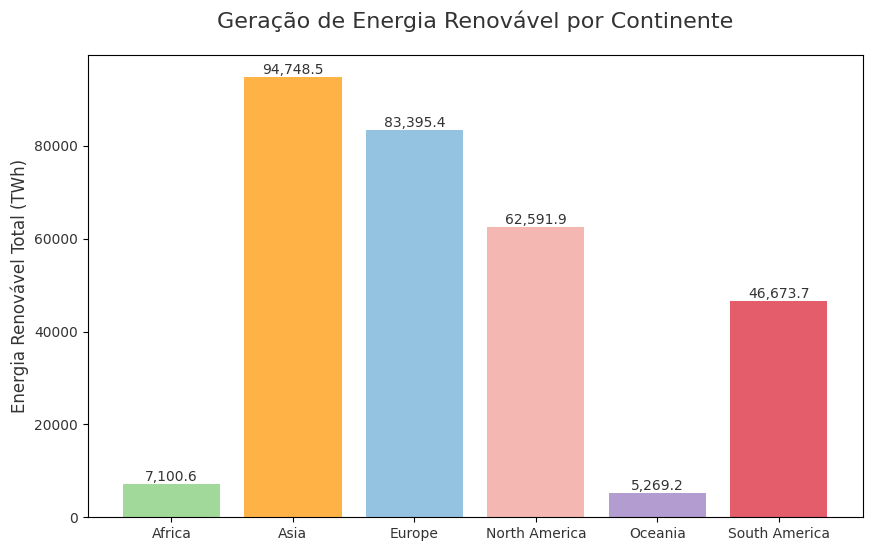

In [35]:
# primeiro gráfico com o total de energia renovável gerada por continente
colors = ['#A1D99B', '#FFB347', '#93C3E1', '#F5B7B1', '#B39CD0', '#E35D6A']  # paleta de cores: https://www.color-hex.com/color-palettes/popular.php

#tamanho do gráfico
plt.figure(figsize=(10, 6))

# gerando gráfico de barras com a paleta de cores escolhida
bars = plt.bar(df_total_continents['Continent'],
               df_total_continents['Total Renewable Energy (TWh)'],
               color=colors)

# incluindo os rótulos de dados no topo das barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    # Adicionar separador de milhar e uma casa decimal
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,  # Ajuste da altura do rótulo
             f"{yval:,.1f}",  # Formato com separador de milhar
             ha='center', va='bottom', fontsize=10, color='#333333')  # Centralizar o rótulo e ajustar o tamanho da fonte

# incluindo título e rótulo do eixo y
plt.title('Geração de Energia Renovável por Continente', fontsize=16, color='#333333', pad=20)
plt.ylabel('Energia Renovável Total (TWh)', fontsize=12, color='#333333')

# ajustando o formato dos eixos
plt.xticks(rotation=0, fontsize=10, color='#333333')  # deixando sem rotação e ajustando o tamanho da fonte do eixo x
plt.yticks(fontsize=10, color='#333333')  # ajustando o  tamanho da fonte do eixo y

# tirando o título do eixo x e a grade do plano de fundo
plt.xlabel('')
plt.grid(False)



In [36]:
df_total_continents.head()


,Continent,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Total Renewable Energy (TWh)
0,Africa,255.057399,6435.748547,145.030000,264.739057,7100.575003
1,Asia,8320.929070,75349.607229,4574.994204,6502.965687,94748.496190
2,Europe,9543.002990,63969.424246,2845.526299,7037.453315,83395.406851
3,North America,3906.684152,53114.477149,898.847089,4671.883959,62591.892349
4,Oceania,410.713355,4045.254202,220.776300,592.427944,5269.171802


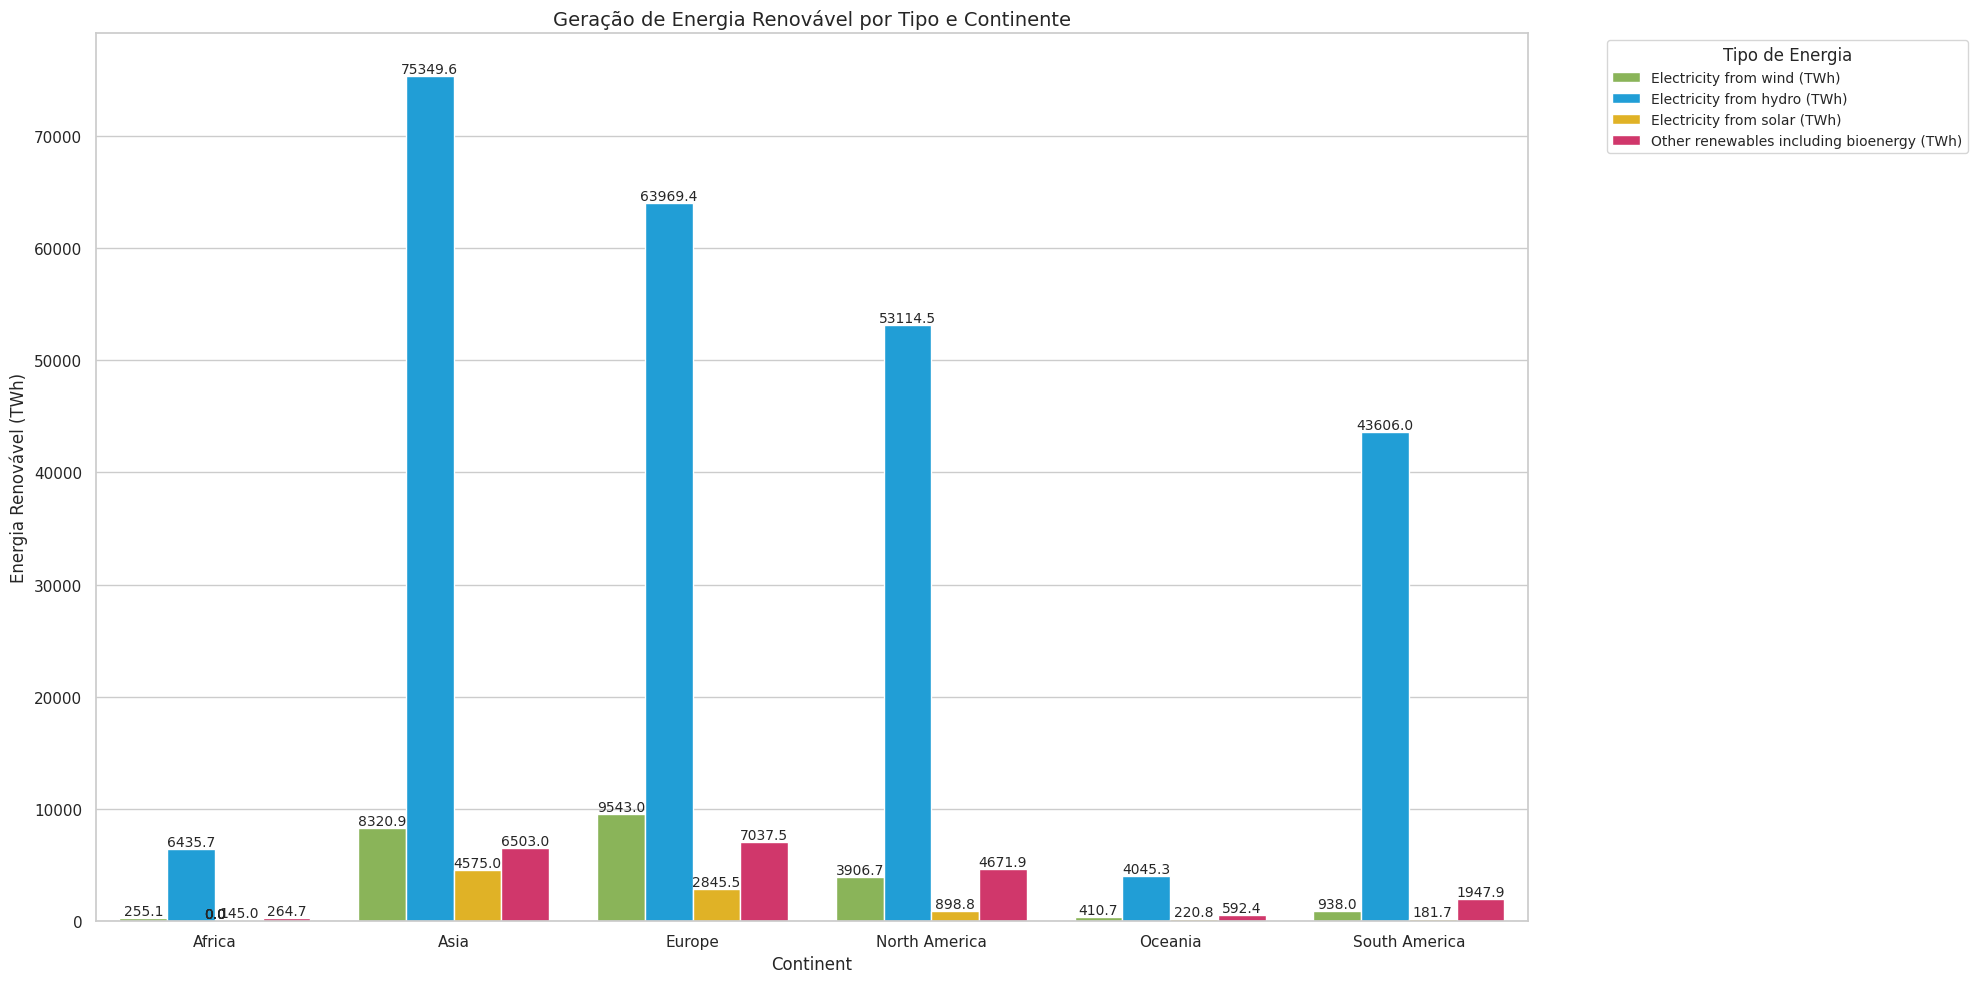

In [37]:
# definindo as cores
colors = ['#8BC34A', '#03A9F4', '#FFC107', '#E91E63']

# tirando o índice para que a coluna 'Continent' esteja disponível para plotagem
#df_total_continents.reset_index(inplace=True)

# definindo os tipos de energia
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

# convertendo o DataFrame para o formato melt, seguindo a documentação da biblioteca seaborn
df_melted = df_total_continents.melt(id_vars='Continent', value_vars=energy_types,
                                     var_name='Energy Type', value_name='TWh')

# configurando o estilo do gráfico
sns.set(style="whitegrid")

# criando o gráfico de barras agrupadas
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(x='Continent', y='TWh', hue='Energy Type', data=df_melted,palette=colors)

# incluindo rótulos de dados no topo de cada barra
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points',  fontsize=10)

# ajustando o título e os rótulos dos eixos
plt.title('Geração de Energia Renovável por Tipo e Continente', fontsize=14)
plt.ylabel('Energia Renovável (TWh)', fontsize=12)

# ajustand a legenda e layout
plt.legend(title='Tipo de Energia', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# exibindo o gráfico
plt.show()


Mostrando a matriz energética renovável dos continentes


In [38]:
# defininfo cores suaves para os diferentes tipos de energia
colors = ['#8BC34A', '#03A9F4', '#FFC107', '#E91E63']

# calculando as proporções de cada fonte de energia
df_total_continents['Wind'] = (df_total_continents['Electricity from wind (TWh)'] / df_total_continents['Total Renewable Energy (TWh)'] * 100).round(2)
df_total_continents['Hydro'] = (df_total_continents['Electricity from hydro (TWh)'] / df_total_continents['Total Renewable Energy (TWh)'] * 100).round(2)
df_total_continents['Solar'] = (df_total_continents['Electricity from solar (TWh)'] / df_total_continents['Total Renewable Energy (TWh)'] * 100).round(2)
df_total_continents['Other'] = (df_total_continents['Other renewables including bioenergy (TWh)'] / df_total_continents['Total Renewable Energy (TWh)'] * 100).round(2)

# preparando os dados no formato ideal para o gráfico
df_melted = df_total_continents.melt(id_vars=['Continent'], value_vars=['Wind', 'Hydro', 'Solar', 'Other'],
                    var_name='Energy_Source', value_name='Percentage')


# definindo cores personalizadas para cada fonte de energia
custom_colors = {
    'Wind': '#8BC34A',  # Azul
    'Hydro': '#03A9F4',  # Verde
    'Solar': '#FFC107',  # Laranja
    'Other': '#E91E63',  # Vermelho
}

# criando o gráfico de barras 100% empilhadas horizontalmente
fig = px.bar(
    df_melted,
    x='Percentage',
    y='Continent',
    #marker_color=colors,
    color='Energy_Source',
    title='Distribuição de Fontes de Energia Renovável por País (TWh)',
    orientation='h',
    text='Percentage',  # Exibindo os valores diretamente nas barras
    labels={'Percentage': 'Proporção de Energia (%)'},
    color_discrete_map=custom_colors  # Aplicando o mapa de cores personalizado
)

# ajustando o layout para melhorar a visualização
fig.update_layout(
    barmode='stack',  # Empilhando as barras
    xaxis=dict(tickformat='.2f'),  # Formatando os valores do eixo x
    legend_title_text='Fonte de Energia',
    title_x=0.5  # Centralizando o título
)

# exibindo o gráfico interativo
fig.show()

Os continentes europeus e asiáticos dominam a produção de energias renováveis, liderados por investimentos robustos em energia eólica e solar. A América do Norte, com grandes capacidades hidroelétricas e projetos eólicos, também se destaca. Enquanto isso, a América do Sul e a África estão em estágios mais diversos da transição energética, mas com um forte foco em fontes como a hidroeletricidade.

1. **Europa**: destacou-se como o continente com a maior geração de energia eólica. Isso reflete os investimentos robustos da região em infraestrutura eólica, especialmente em países como Alemanha, Dinamarca e Reino Unido, que são pioneiros em energia renovável. O continente está capitalizando as condições favoráveis para parques eólicos, tanto onshore quanto offshore.

2. **América do Sul**: fortemente dependente da energia hidrelétrica, representando uma parcela significativa da geração total de energia renovável na região.Com destaque para o Brasil e Venezuela, que tem grandes projetos hidrelétricos.


3. **Ásia**:demonstra uma diversificação em várias fontes de energia renovável. Embora a energia solar e hidrelétrica tenham uma maior participação, há um crescimento notável também em outras fontes renováveis.

4. **América do Norte**: embora a energia eólica e hidrelétrica sejam bem representadas, a América do Norte (principalmente os EUA) tem um crescimento importante na energia solar.

5. **Oceania**:apresenta um perfil mais modesto em termos de volume total de energia renovável. No entanto, a energia solar tem uma presença relevante, principalmente na Austrália, que conta com grandes áreas para aproveitar esse recurso.

6. **África**: tem uma participação menor em energias renováveis em comparação com outros continentes. A hidroeletricidade ainda domina a geração de energia renovável no continente. Tem um grande potencial de crescimento em energia renovável, especialmente solar e eólica, mas enfrenta desafios estruturais e financeiros para expandir essas fontes de forma significativa.

###Analisando a evolução da geração de energia ao longo do tempo por Continente



In [39]:
# agrupando o DataFrame por 'Continent' e 'Year' e somar as demais colunas de geração de energia por tipo
df_continent_by_year = df_continents.groupby(['Continent', 'Year'], as_index=False).sum()
df_continent_by_year = df_continent_by_year.drop(columns=['Country', 'Total Renewable Energy (TWh)'])


df_continent_by_year.tail()

,Continent,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
338,South America,2017,102.570000,1327.29996,10.92,123.669313
339,South America,2018,120.090000,1362.04000,20.76,129.747252
340,South America,2019,143.830000,1331.58000,30.70,128.126550
341,South America,2020,157.750000,1322.74000,42.90,136.691824
342,South America,2021,197.330006,1251.08000,63.76,138.983712


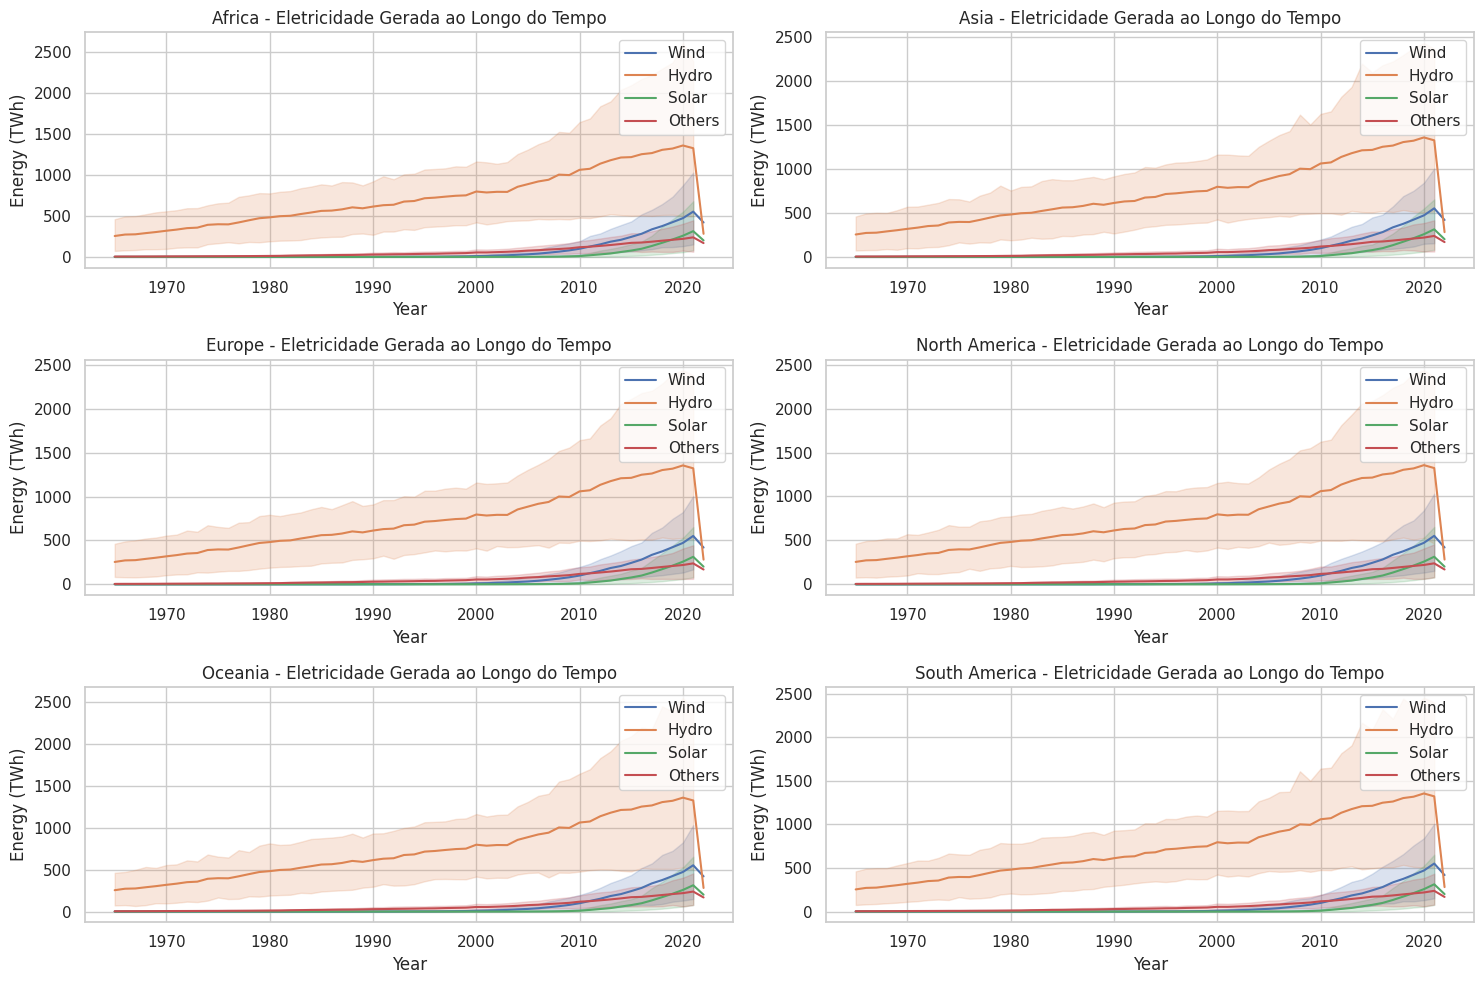

In [40]:
# removendo o índice para que a coluna 'Continent' e 'Year' estejam disponíveis para o gráfico
#df_continents.reset_index(inplace=True)

# definindo cores suaves para os diferentes tipos de energia
colors = ['#8BC34A', '#03A9F4', '#FFC107', '#E91E63']

# configurando o estilo dos gráficos e tamanhos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# lista de continentes
continents = df_continent_by_year['Continent'].unique()

# criando gráficos de linha para cada continente
for i, continent in enumerate(continents):
    plt.subplot(3, 2, i + 1)  # 6 subplots no formato 3x2
    df_continent_year = df_continent_by_year[df_continent_by_year['Continent'] == continent]

    # plotando as linhas para cada tipo de energia
    sns.lineplot(x='Year', y='Electricity from wind (TWh)', data=df_continent_by_year, label='Wind')
    sns.lineplot(x='Year', y='Electricity from hydro (TWh)', data=df_continent_by_year, label='Hydro')
    sns.lineplot(x='Year', y='Electricity from solar (TWh)', data=df_continent_by_year, label='Solar')
    sns.lineplot(x='Year', y='Other renewables including bioenergy (TWh)', data=df_continent_by_year, label='Others')

    # definindo título e rótulos
    plt.title(f'{continent} - Eletricidade Gerada ao Longo do Tempo')
    plt.ylabel('Energy (TWh)')
    plt.legend()
    plt.tight_layout()

# exibindo os gráficos
plt.show()

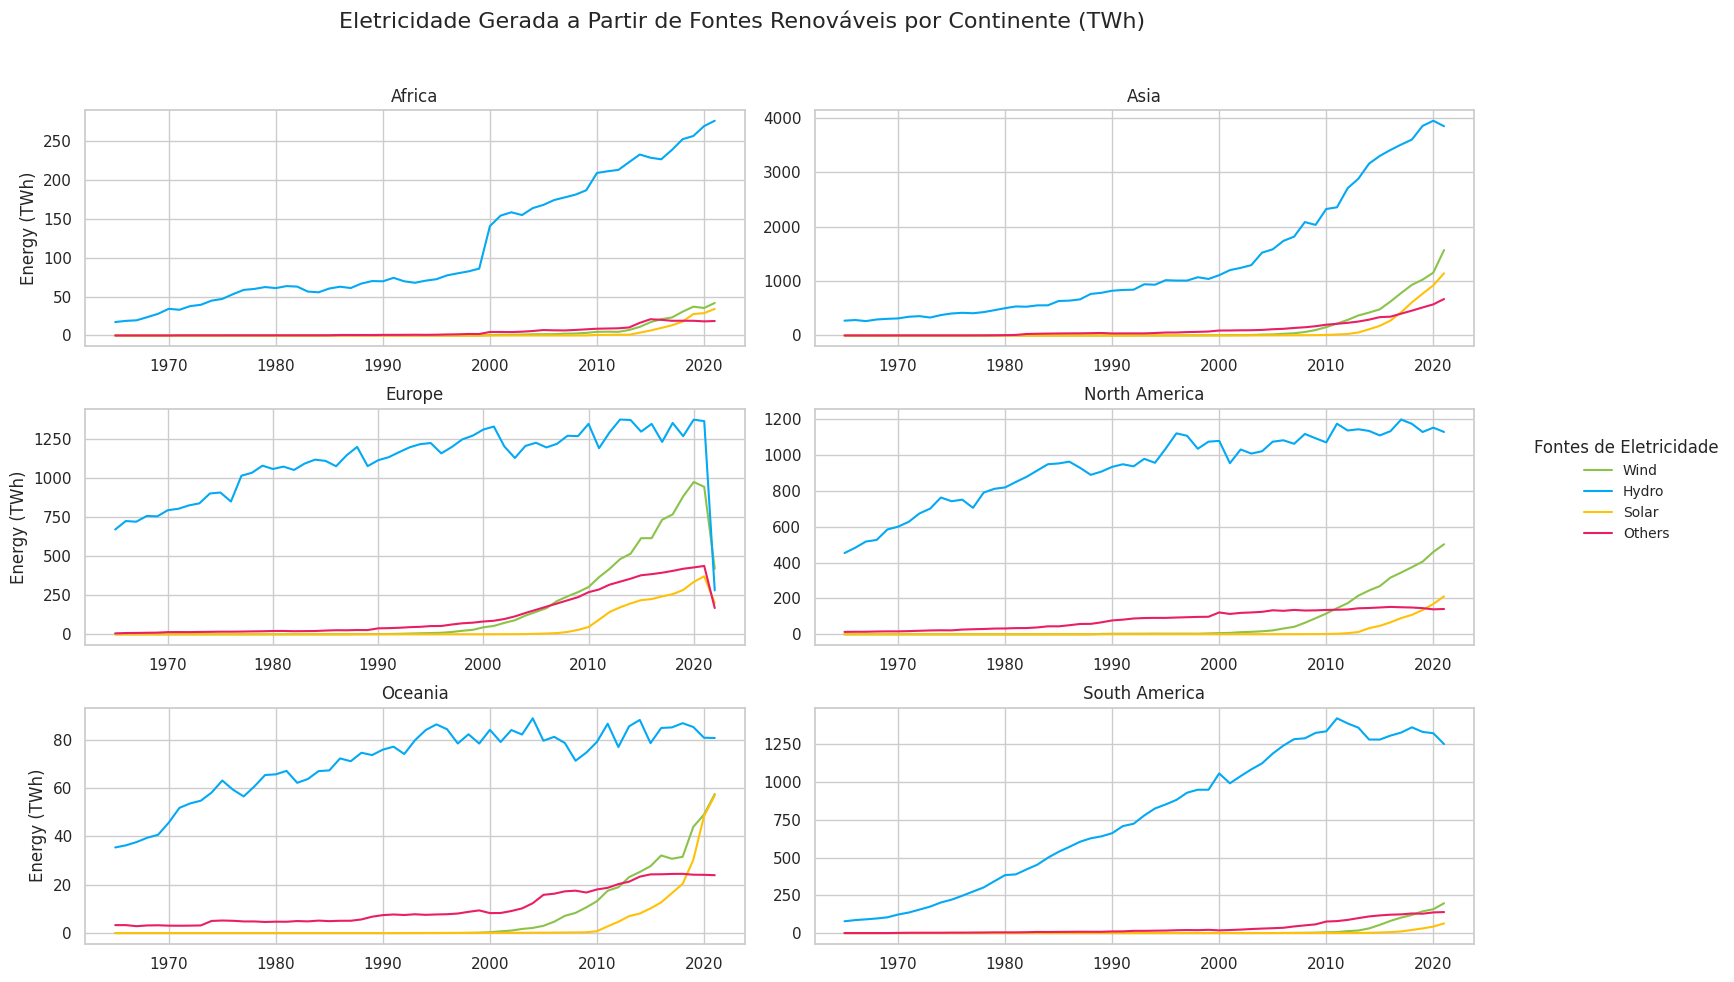

In [41]:
# sumarizando a energia gerada por tipo e por ano em cada continente
df_summary = df_continent_by_year.groupby(['Year', 'Continent']).sum().reset_index()

# configurando o estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# lista de continentes
continents = df_summary['Continent'].unique()

# definindo cores específicas para cada tipo de eletricidade
colors = ['#8BC34A', '#03A9F4', '#FFC107', '#E91E63']  # Verde, Azul, Amarelo, Rosa

# criando gráficos de linha para cada continente
for i, continent in enumerate(continents):
    plt.subplot(3, 2, i + 1)  # 6 subplots no formato 3x2
    df_continente = df_summary[df_summary['Continent'] == continent]

    # plotando as linhas para cada tipo de energia
    sns.lineplot(x='Year', y='Electricity from wind (TWh)', data=df_continente, label='Wind', color=colors[0])
    sns.lineplot(x='Year', y='Electricity from hydro (TWh)', data=df_continente, label='Hydro', color=colors[1])
    sns.lineplot(x='Year', y='Electricity from solar (TWh)', data=df_continente, label='Solar', color=colors[2])
    sns.lineplot(x='Year', y='Other renewables including bioenergy (TWh)', data=df_continente, label='Others', color=colors[3])

    # incluindo os títulos e rótulos apenas em gráficos da esquerda
    if i % 2 == 0:
        plt.xlabel('')
        plt.ylabel('Energy (TWh)')
    else:
        plt.xlabel('')
        plt.ylabel('')  #  tira o rótulo do eixo y nos gráficos da direita

    # títulos de cada subplot
    plt.title(f'{continent}')

    # removendo legenda dos subplots
    plt.legend().remove()
    plt.tight_layout()

# criando a legenda global no começo
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), title="Fontes de Eletricidade", fontsize=10, frameon=False)

# ajustando de layout para dar espaço para a legenda
plt.subplots_adjust(top=0.88)

# adicionando um título geral
plt.suptitle('Eletricidade Gerada a Partir de Fontes Renováveis por Continente (TWh)', fontsize=16)

# exibindo os gráficos
plt.show()

No geral, a geração de energia renovável está crescendo em todo o mundo, com a energia solar e eólica liderando o aumento em diversas regiões, como Ásia, Europa e América do Norte. A hidroeletricidade, embora já bem estabelecida, segue como a principal fonte de energia renovável em América do Sul e Ásia. Fontes alternativas, têm uma presença menor, mas desempenham um papel relevante, especialmente na Europa.

A seguir, tem um detalhamento sobre cada tipo de energia renovável:

1. **Energia Eólica**: está em expansão, com destaque para a Europa e a América do Norte. Indicando que a capacidade instalada de turbinas eólicas nesses continentes tem aumentado de forma consistente.Especificamente em continentes como a Ásia e a América do Sul, a energia eólica ainda está em fase de crescimento, mas tem mostrado um potencial considerável para expansão.

2. **Energia Hidrelétrica**: segue sendo a principal fonte de energia renovável em regiões como a América do Sul e a Ásia. Esses continentes aproveitam seus recursos naturais, como grandes rios, para manter uma produção estável de energia.No entanto, o crescimento da energia hidrelétrica é mais lento em comparação com outras fontes, indicando que a maioria dos grandes projetos já está em operação e atingindo seu teto de exploração desse tipo de energia.

3. **Energia Solar**: está crescendo rapidamente em todos os continentes, principalmente na Ásia e na América do Norte. Indicando que estes continentes estão investindo significativamente na instalação de painéis solares.
O crescimento da energia solar é um dos mais acelerados entre as fontes renováveis, o que monstra seu potencial como uma solução para a transição energética global.

4. **Outros tipos de energias renováveis**: têm uma presença mais modesta em comparação com a solar, eólica e hidrelétrica. Europa lidera nesse tipo de energia, com uma produção mais constante ao longo do tempo. A África e a América do Sul, essas fontes alternativas ainda são pouco exploradas, indicando um espaço para crescimento futuro.



África e América do Sul têm grande potencial para expandir a geração de energia solar e eólica. Investimentos em infraestrutura e tecnologias nesses continentes podem acelerar a transição energética e fornecer uma solução sustentável no longo prazo.

Europa e América do Norte já estão bem estabelecidas em termos de diversificação de fontes de energia renovável, mas podem continuar explorando o outras fontes de energia renováveis alternativas.

Com o agravamento das mudanças climáticas, é essencial acelerar a transição para energias renováveis para reduzir as emissões de carbono e dimimuir os impactos no clima global. Ações coordenadas entre governos e o setor privado podem acelerar a adoção dessas energias em escala global.

Expandir o uso de fontes renováveis como solar e eólica, especialmente em regiões com potencial ainda não explorado,principalmente na Africa, será de grande ajuda para atender as demandas globais de energia sustentável e a mitigar o rápido crescimento das mudanças climáticas.


###Analisando a taxa de crescimento da geração de energia renovável

In [51]:
# sumarizando a energia gerada por tipo por ano e continente
df_growth_by_year = df_continent_by_year.groupby(['Year', 'Continent']).sum().reset_index()

# ordenando os dados por continente e ano para o cálculo da taxa de crescimento
df_growth_by_year = df_growth_by_year.sort_values(by=['Continent', 'Year'])

# substituindo valores zero por NaN para evitar divisão por zero no cálculo de pct_change
df_growth_by_year['Electricity from wind (TWh)'] = df_growth_by_year['Electricity from wind (TWh)'].replace(0, pd.NA)
df_growth_by_year['Electricity from hydro (TWh)'] = df_growth_by_year['Electricity from hydro (TWh)'].replace(0, pd.NA)
df_growth_by_year['Electricity from solar (TWh)'] = df_growth_by_year['Electricity from solar (TWh)'].replace(0, pd.NA)
df_growth_by_year['Other renewables including bioenergy (TWh)'] = df_growth_by_year['Other renewables including bioenergy (TWh)'].replace(0, pd.NA)

# calculando a taxa de crescimento anual para cada tipo de energia, sem usar o método fill
df_growth_by_year['YoY_Wind'] = df_growth_by_year.groupby('Continent')['Electricity from wind (TWh)'].pct_change(fill_method=None) * 100
df_growth_by_year['YoY_Hydro'] = df_growth_by_year.groupby('Continent')['Electricity from hydro (TWh)'].pct_change(fill_method=None) * 100
df_growth_by_year['YoY_Solar'] = df_growth_by_year.groupby('Continent')['Electricity from solar (TWh)'].pct_change(fill_method=None) * 100
df_growth_by_year['YoY_Other'] = df_growth_by_year.groupby('Continent')['Other renewables including bioenergy (TWh)'].pct_change(fill_method=None) * 100

# substituindo NaNs restantes por 0 após o cálculo da taxa de crescimento
df_growth_by_year['YoY_Wind'] = df_growth_by_year['YoY_Wind'].fillna(0)
df_growth_by_year['YoY_Hydro'] = df_growth_by_year['YoY_Hydro'].fillna(0)
df_growth_by_year['YoY_Solar'] = df_growth_by_year['YoY_Solar'].fillna(0)
df_growth_by_year['YoY_Other'] = df_growth_by_year['YoY_Other'].fillna(0)

# exibindo as colunas de interesse: ano, continente e taxas de crescimento por tipo de energia
df_growth = df_growth_by_year[['Year', 'Continent',
                               'YoY_Wind',
                               'YoY_Hydro',
                               'YoY_Solar',
                               'YoY_Other']]

# verificando se o cálculo funcionou com as primeiras linhas do dataset
df_growth.head()

,Year,Continent,YoY_Wind,YoY_Hydro,YoY_Solar,YoY_Other
0,1965,Africa,0.0,0.000000,0.0,0.0
6,1966,Africa,0.0,8.631270,0.0,0.0
12,1967,Africa,0.0,3.967216,0.0,0.0
18,1968,Africa,0.0,20.787651,0.0,0.0
24,1969,Africa,0.0,18.052387,0.0,0.0


In [56]:
df_growth.describe()

,Year,YoY_Wind,YoY_Hydro,YoY_Solar,YoY_Other
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,1993.084548,241.065524,3.112531,144.452584,8.962099
std,16.526299,3997.814770,7.936918,2075.521109,19.666492
min,1965.000000,-55.547118,-79.384825,-45.898723,-61.548663
25%,1979.000000,0.000000,-0.076711,0.000000,0.595311
50%,1993.000000,4.848485,3.075784,0.000000,4.914670
75%,2007.000000,29.658659,6.391883,26.889373,11.195344
max,2022.000000,74050.228592,63.614384,38361.538462,167.174338


In [93]:
# criando uma função para criar 4 gráficos lado a lado (2x2) com alguns ajustes
def plot_all_growth(data, continent):
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))

    # Plot 1: Energia Eólica
    sns.barplot(x='Year', y='YoY_Wind', data=data, color="#8BC34A", ax=axes[0, 0])
    axes[0, 0].set_ylabel("Yearly Growth (%)")  # Título do eixo y apenas no gráfico da primeira coluna
    axes[0, 0].set_title("Wind")

    # Plot 2: Energia Hidrelétrica
    sns.barplot(x='Year', y='YoY_Hydro', data=data, color="#03A9F4", ax=axes[0, 1])
    axes[0, 1].set_title("Hydro")
    axes[0, 1].set_ylabel('')

    # Plot 3: Energia Solar
    sns.barplot(x='Year', y='YoY_Solar', data=data, color="#FFC107", ax=axes[1, 0])
    axes[1, 0].set_title("Solar")
    axes[1, 0].set_ylabel("Yearly Growth (%)")

    # Plot 4: Outras Renováveis
    sns.barplot(x='Year', y='YoY_Other', data=data, color="#E91E63", ax=axes[1, 1])
    axes[1, 1].set_title("Others")
    axes[1, 1].set_ylabel('')

    # ajustando nos eixos x (anos) e remoção dos títulos do eixo x
    for ax in axes.flat:
        ax.set_xlabel('')  # Removendo título do eixo x
        ax.set_xticks(range(len(data['Year'].unique())))  # Definindo corretamente a posição dos rótulos
        ax.set_xticklabels(data['Year'].unique(), rotation=45, fontsize=8)  # Aplicando rótulos corretamente
        ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.6)  # Linhas de grade verticais

    # adicionando o título principal pelo continente
    fig.suptitle(f"Yearly Growth of Renewable Energy - {continent}", fontsize=16, fontweight='bold')

    # aumentando o espaçamento entre os gráficos
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    plt.tight_layout()
    plt.show()


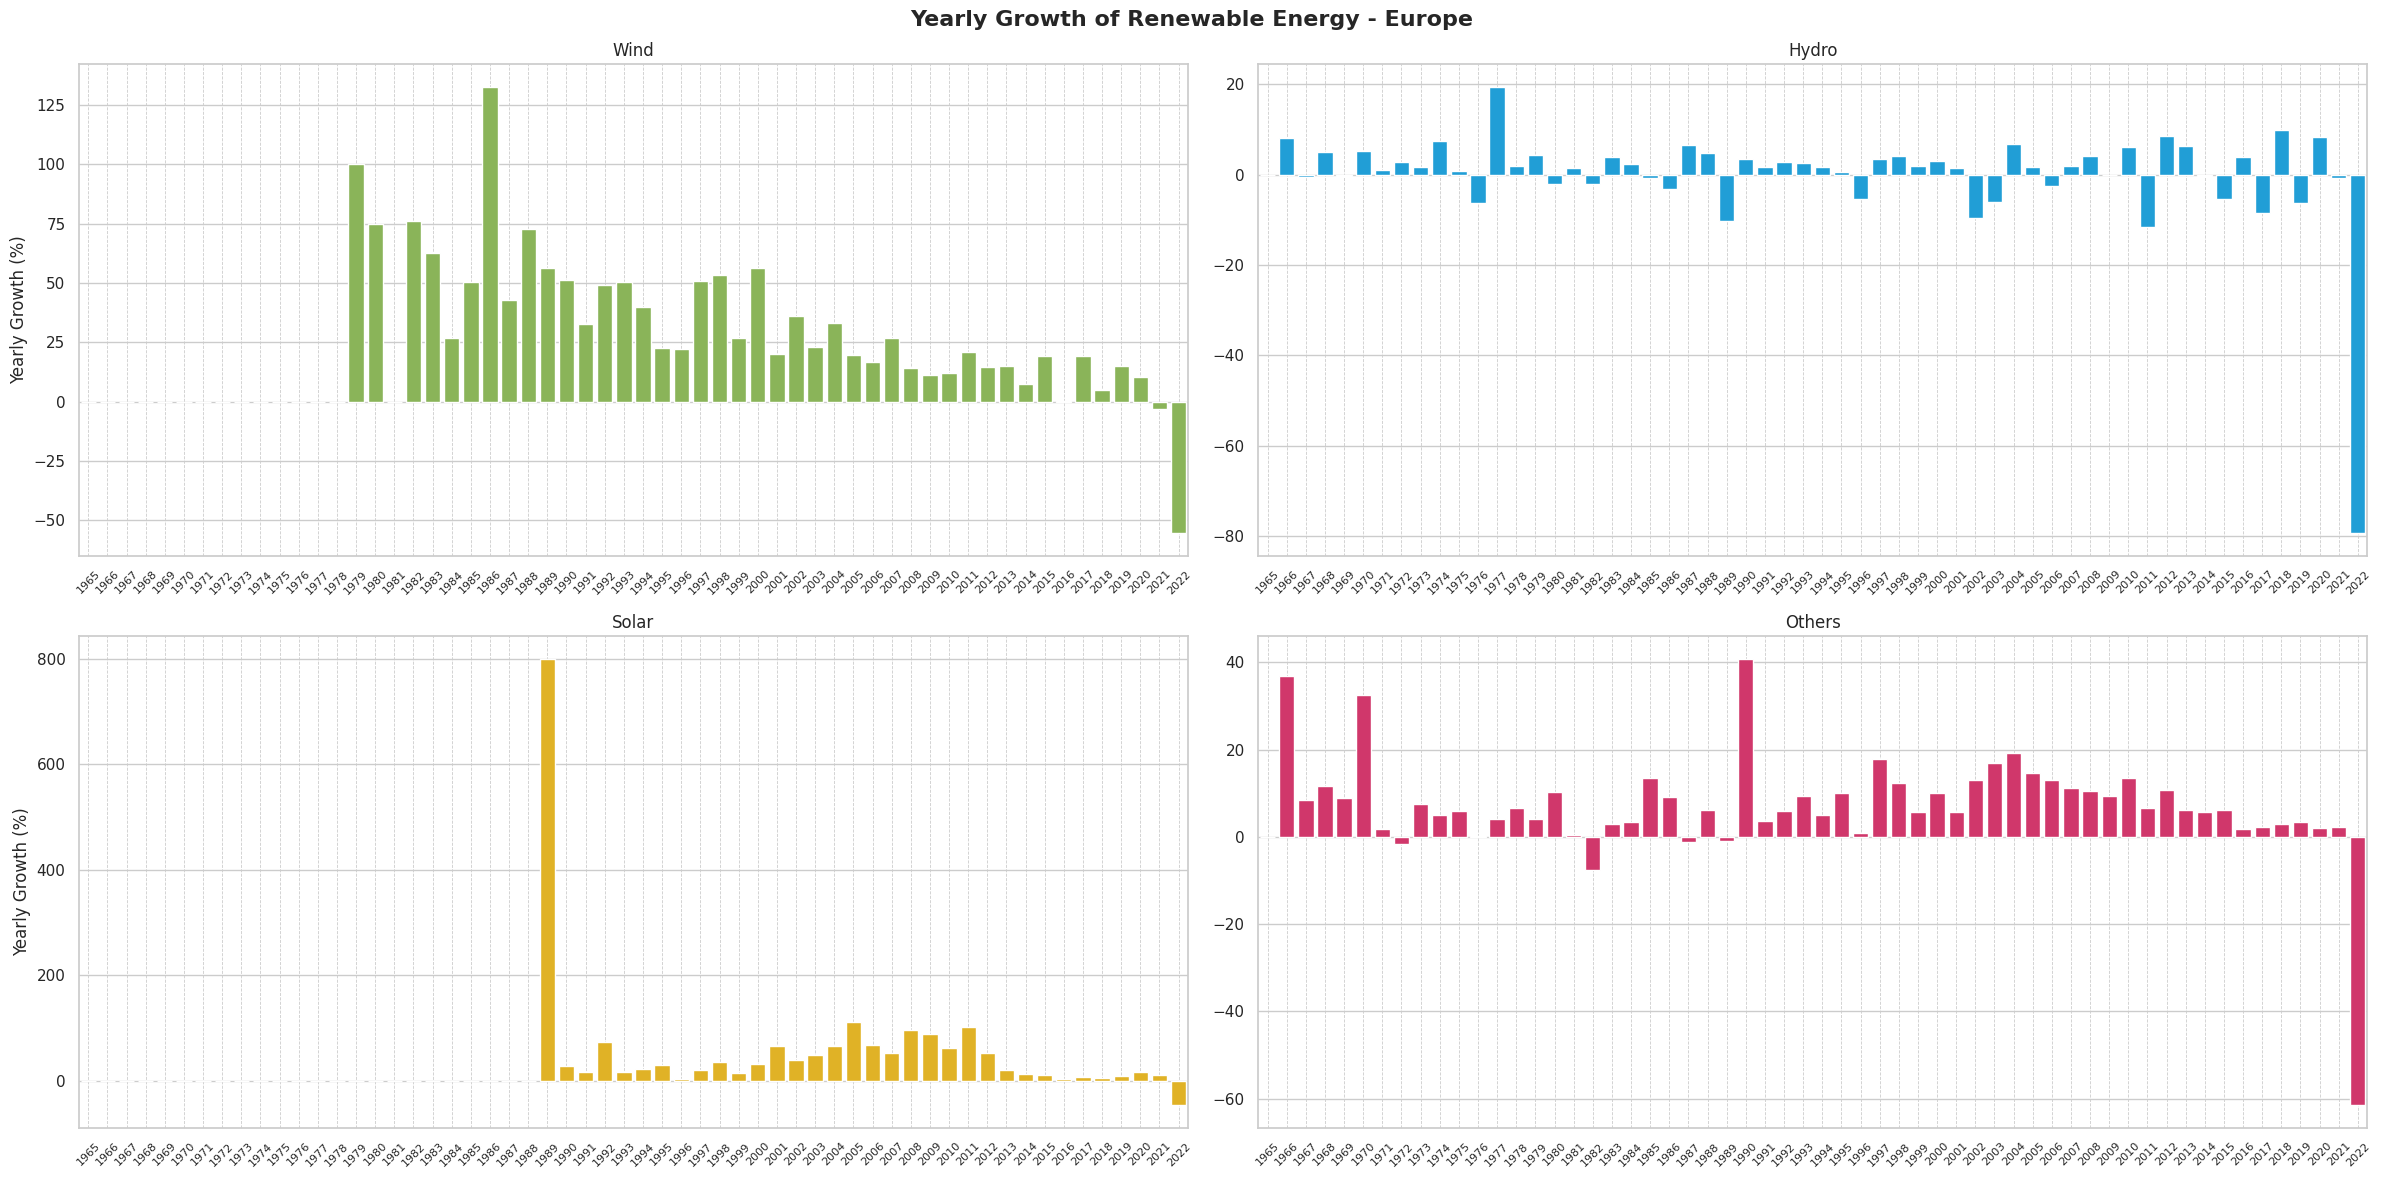

In [94]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# filtrando os dados para o continente: Europa
df_europe_growth = df_growth[df_growth['Continent'] == 'Europe']


# chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "Europe")

1. **Energia Eólica**: desde 1978, a energia eólica na Europa cresceu rapidamente. Enquanto o crescimento da energia solar desacelerou entre 1997 e 2011, a energia eólica continuou a expandir. Ao longo do tempo, o crescimento eólico tem sido consistente e robusto, mas apresenta variações mais suaves, indicando que o mercado de energia eólica está mais maduro e estabilizado.

2. **Energia Hidrelétrica**: mostra um crescimento mais irregular, com picos seguidos por períodos de estagnação ou queda. Isso pode ser explicado por fatores como condições climáticas (períodos de seca) ou pelo fato de que muitos dos recursos hídricos já estão totalmente explorados.

3. **Energia Solar**: teve um crescimento constante entre 1997 e 2011. No entanto, após esse período, houve uma redução significativa no ritmo de expansão, sugerindo possíveis mudanças nas políticas ou no mercado que afetaram o setor.

4. **Outras Renováveis**: Apesar de um crescimento mais modesto e menos previsível, outras fontes de energia renovável continuam a desempenhar um papel importante na diversificação da matriz energética da Europa, contribuindo para o avanço das energias limpas.

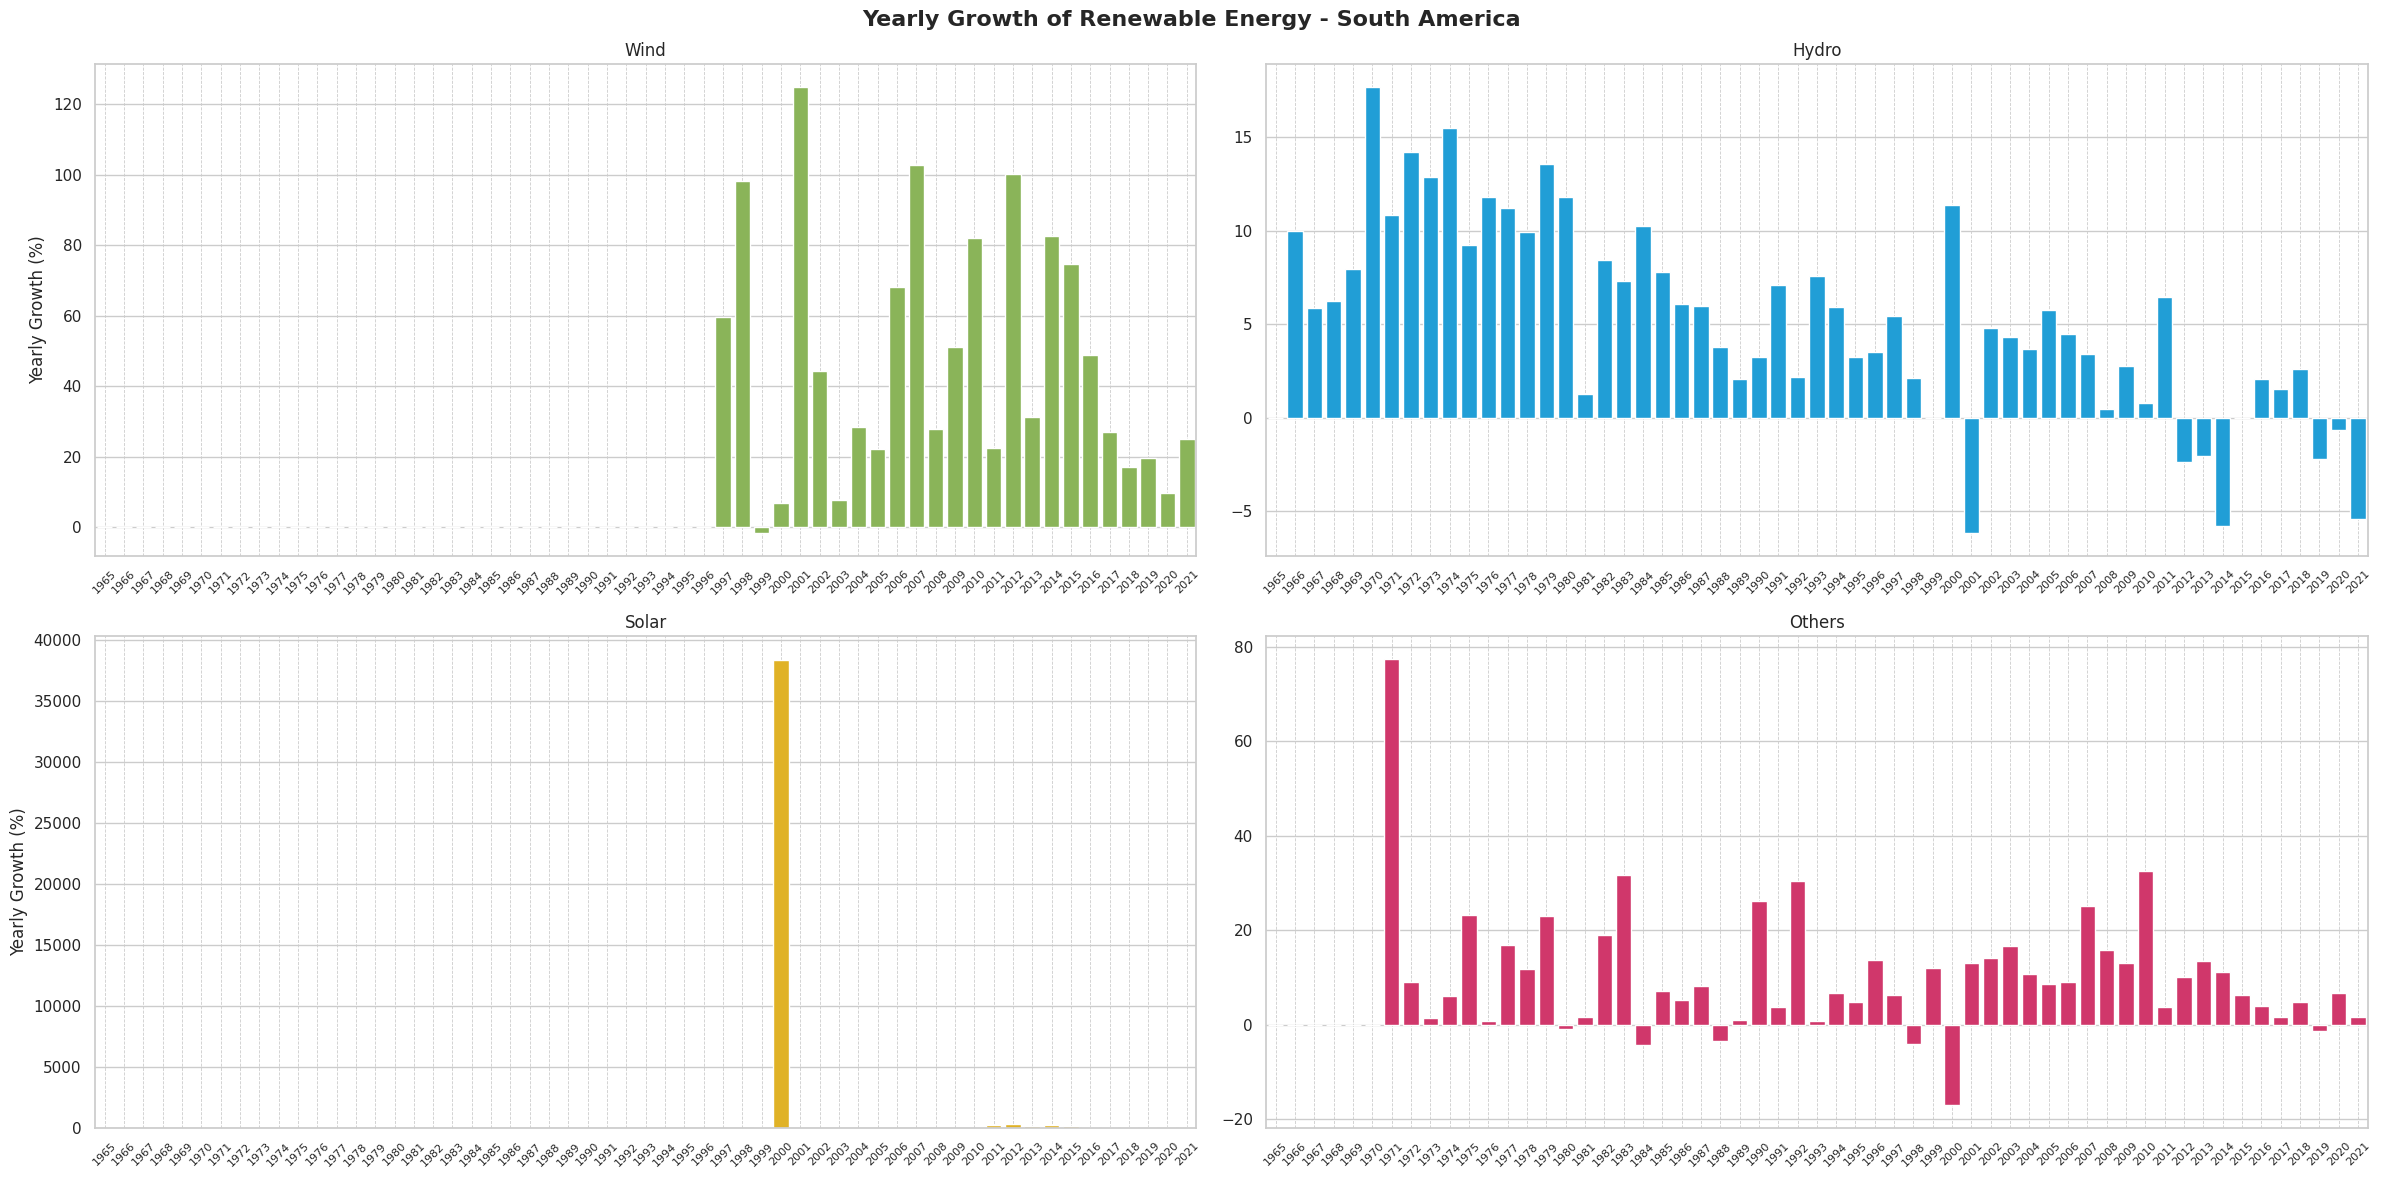

In [95]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# Filtrando os dados para o continente America do Sul
df_europe_growth = df_growth[df_growth['Continent'] == 'South America']


# chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "South America")

1. **Energia Solar**: O crescimento mais significativo na geração começou em 1997, com um pequeno recuo em 1999, seguido de uma contínua expansão na produção desse tipo de energia renovável.

2. **Energia Eólica**: Fortemente influenciada por fatores climáticos, como períodos de seca, essa fonte de energia apresentou grande oscilação nos últimos anos, desde 2012, conforme ilustrado no gráfico.

3. **Energia Hidrelétrica**: O ano de 2000 foi um marco, com um crescimento expressivo na geração em comparação aos outros anos, seguido por um período de estabilidade. Foi o tipo de energia renovável com o maior crescimento na América do Sul.

4. **Outras Renováveis**: Com exceção do ano 2000, a geração de outras fontes renováveis manteve-se estável ao longo dos anos, com um pico em 1970, quando essas fontes começaram a ganhar destaque no continente.

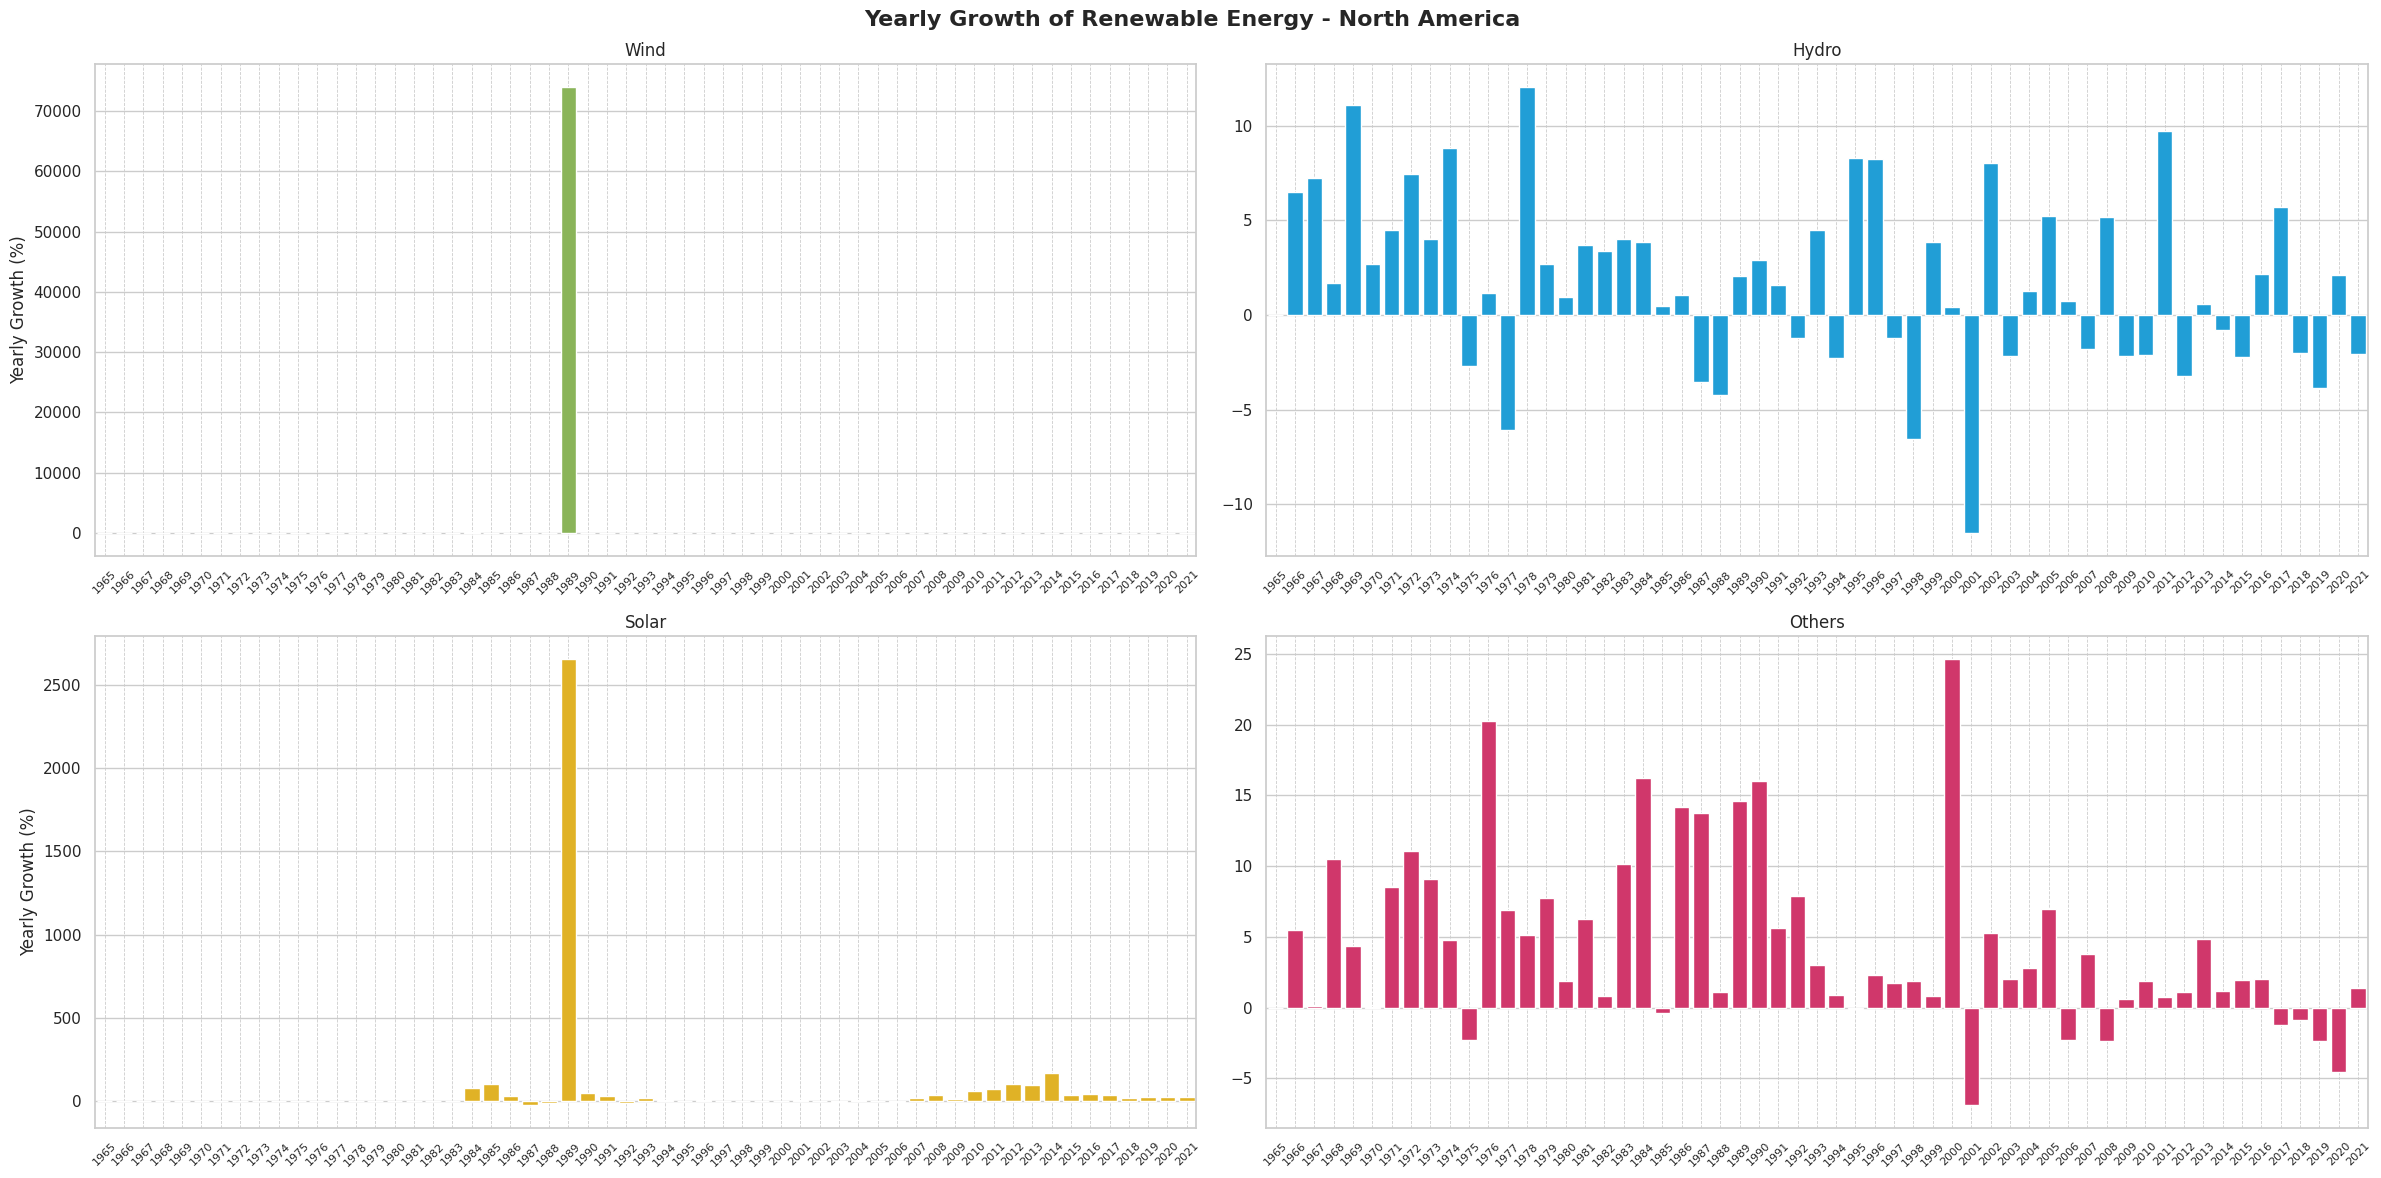

In [96]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# Filtrando os dados para o continente America do Nortw
df_europe_growth = df_growth[df_growth['Continent'] == 'North America']


# Chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "North America")

1. **Energia Eólica**: destaque para o ano de 1989, onde houve um expressivo crescimento na geração de energia eólica no continente.

2. **Energia Hidrelétrica**: segue o mesmo comportamento dos continentes analisados anteriormente, sempre muito influenciado pelas condições climáticas (períodos de seca) nos últimos anos, podendo ser reflexo das mudanças climáticas.

3. **Energia Solar**: mesmo cenário da geração de energia eólica, o ano de 1989 foi também destaque, seguido de um crescimento mais estável até 2021.

4. **Outras Renováveis**: nota-se um leve descrescimento na geração de energia por outras fontes de energias renováveis nos últimos anos de 2017 até 2020

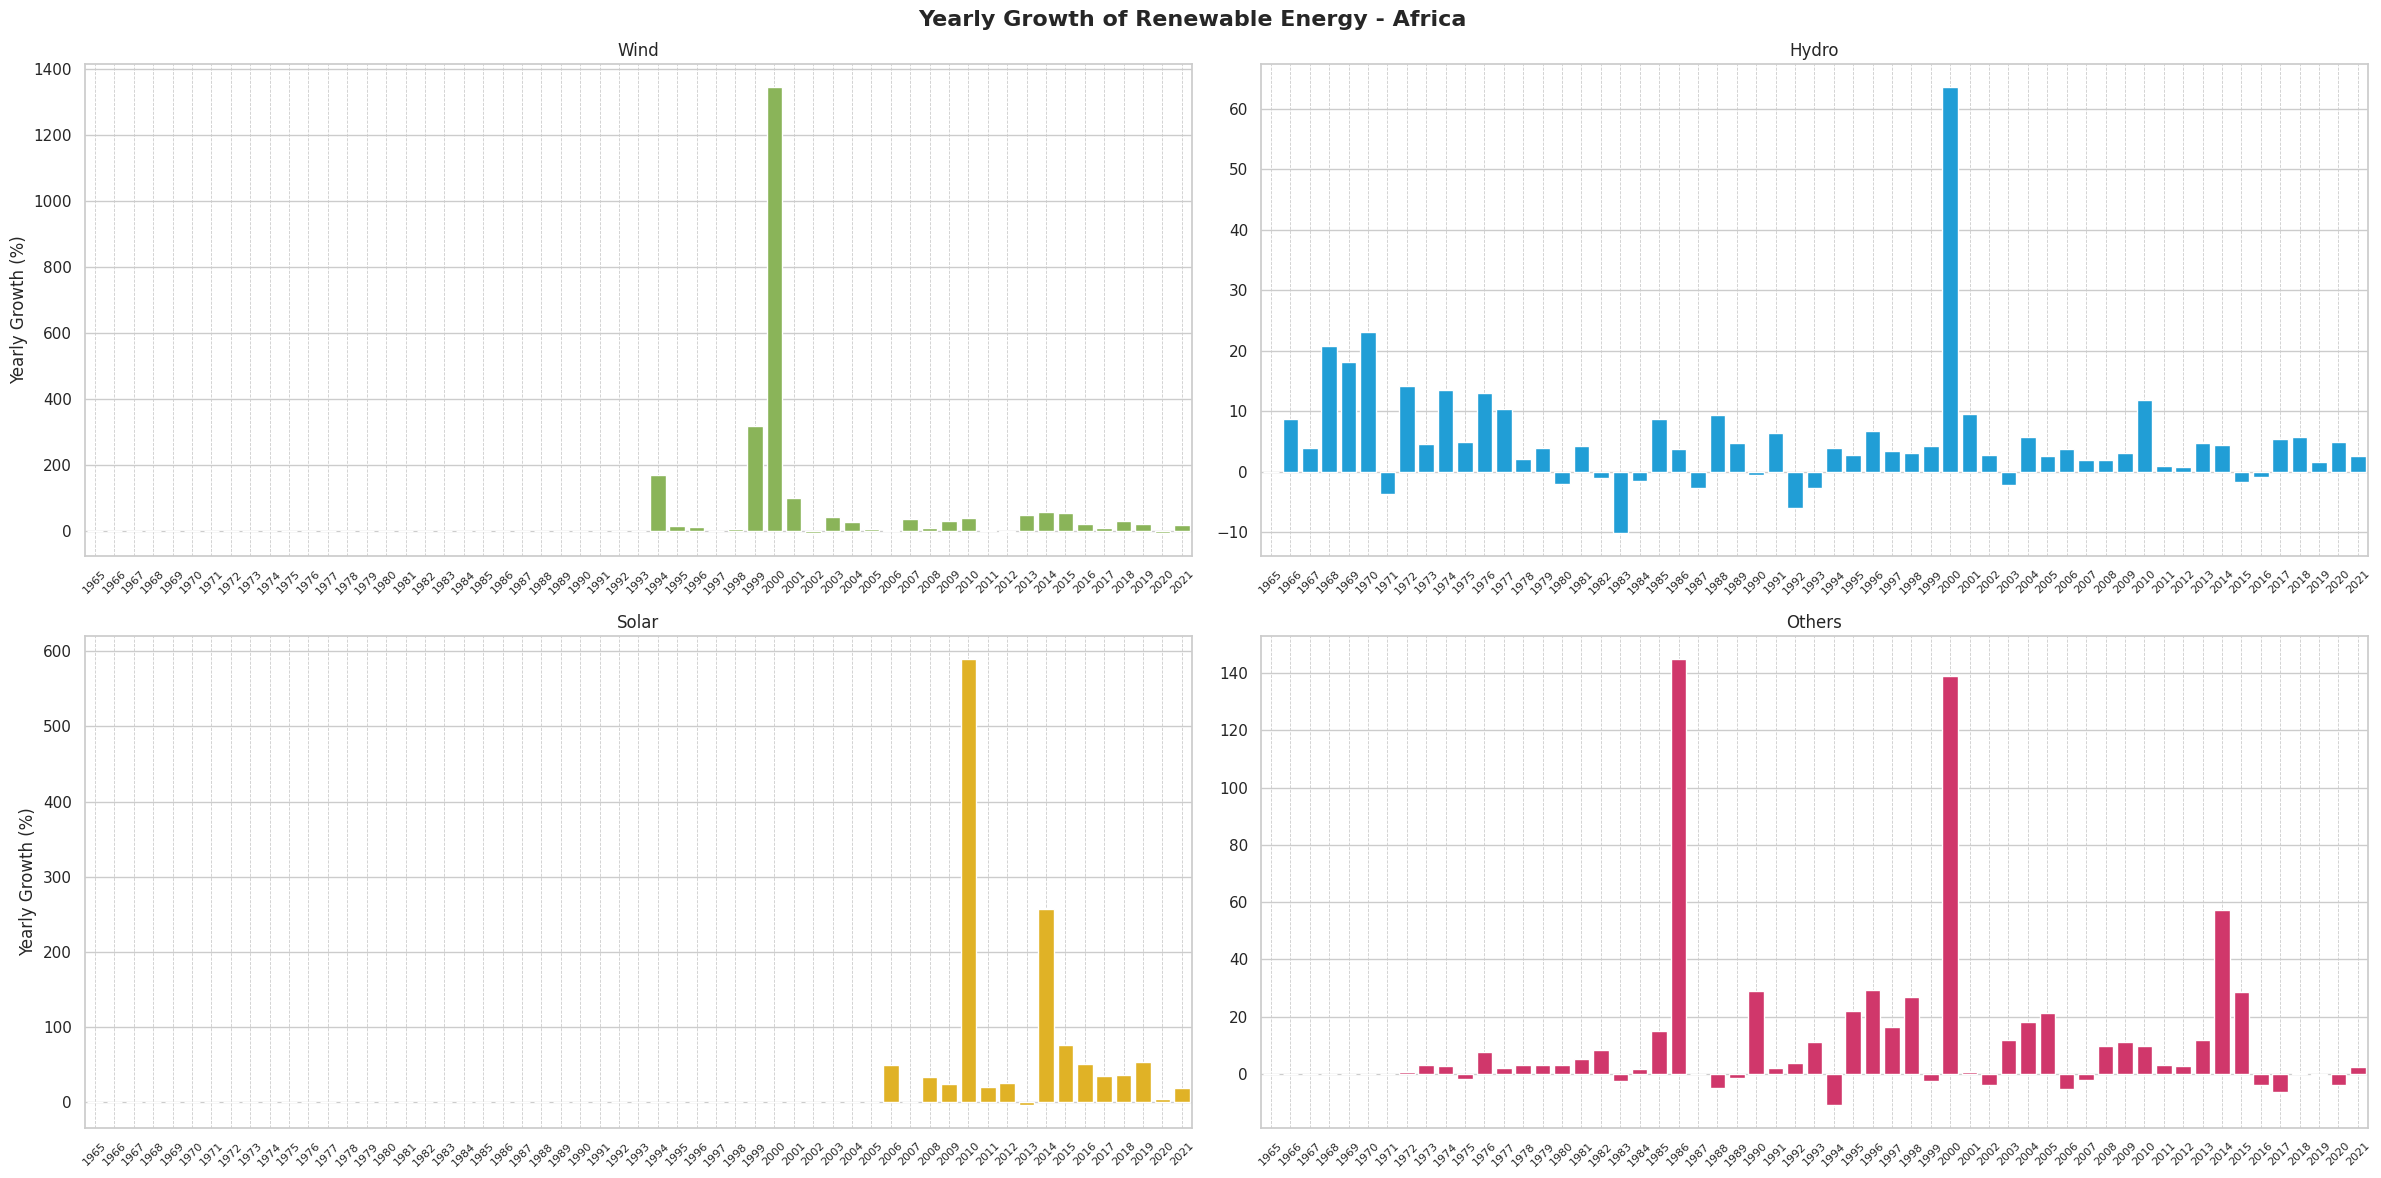

In [97]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# Filtrando os dados para o continente Africa
df_europe_growth = df_growth[df_growth['Continent'] == 'Africa']


# Chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "Africa")

1. **Energia Eólica**: o ano de 2000 registrou o maior crescimento na geração de energia eólica na África, sugerindo a instalação de novas turbinas eólicas pelo continente.

2. **Energia Hidrelétrica**: diferente de outros continentes, a geração de energia hidrelétrica na África teve pouca oscilação. Isso sugere que não houve grandes períodos de seca, e o ano de 2000 foi marcado por um alto volume de chuvas, resultando em um pico na geração hidrelétrica.

3. **Energia Solar**: o desenvolvimento dessa fonte começou em 2005, com destaque em 2010, quando ocorreu um pico de crescimento. Desde então, a geração de energia solar tem se mantido estável até 2021.

4. **Outras Renováveis**: seguindo o padrão da energia hidrelétrica, a geração por outras fontes renováveis vem sendo registrada desde 1972, com picos em 1986 e 2000. No entanto, observa-se um declínio desde 2016.

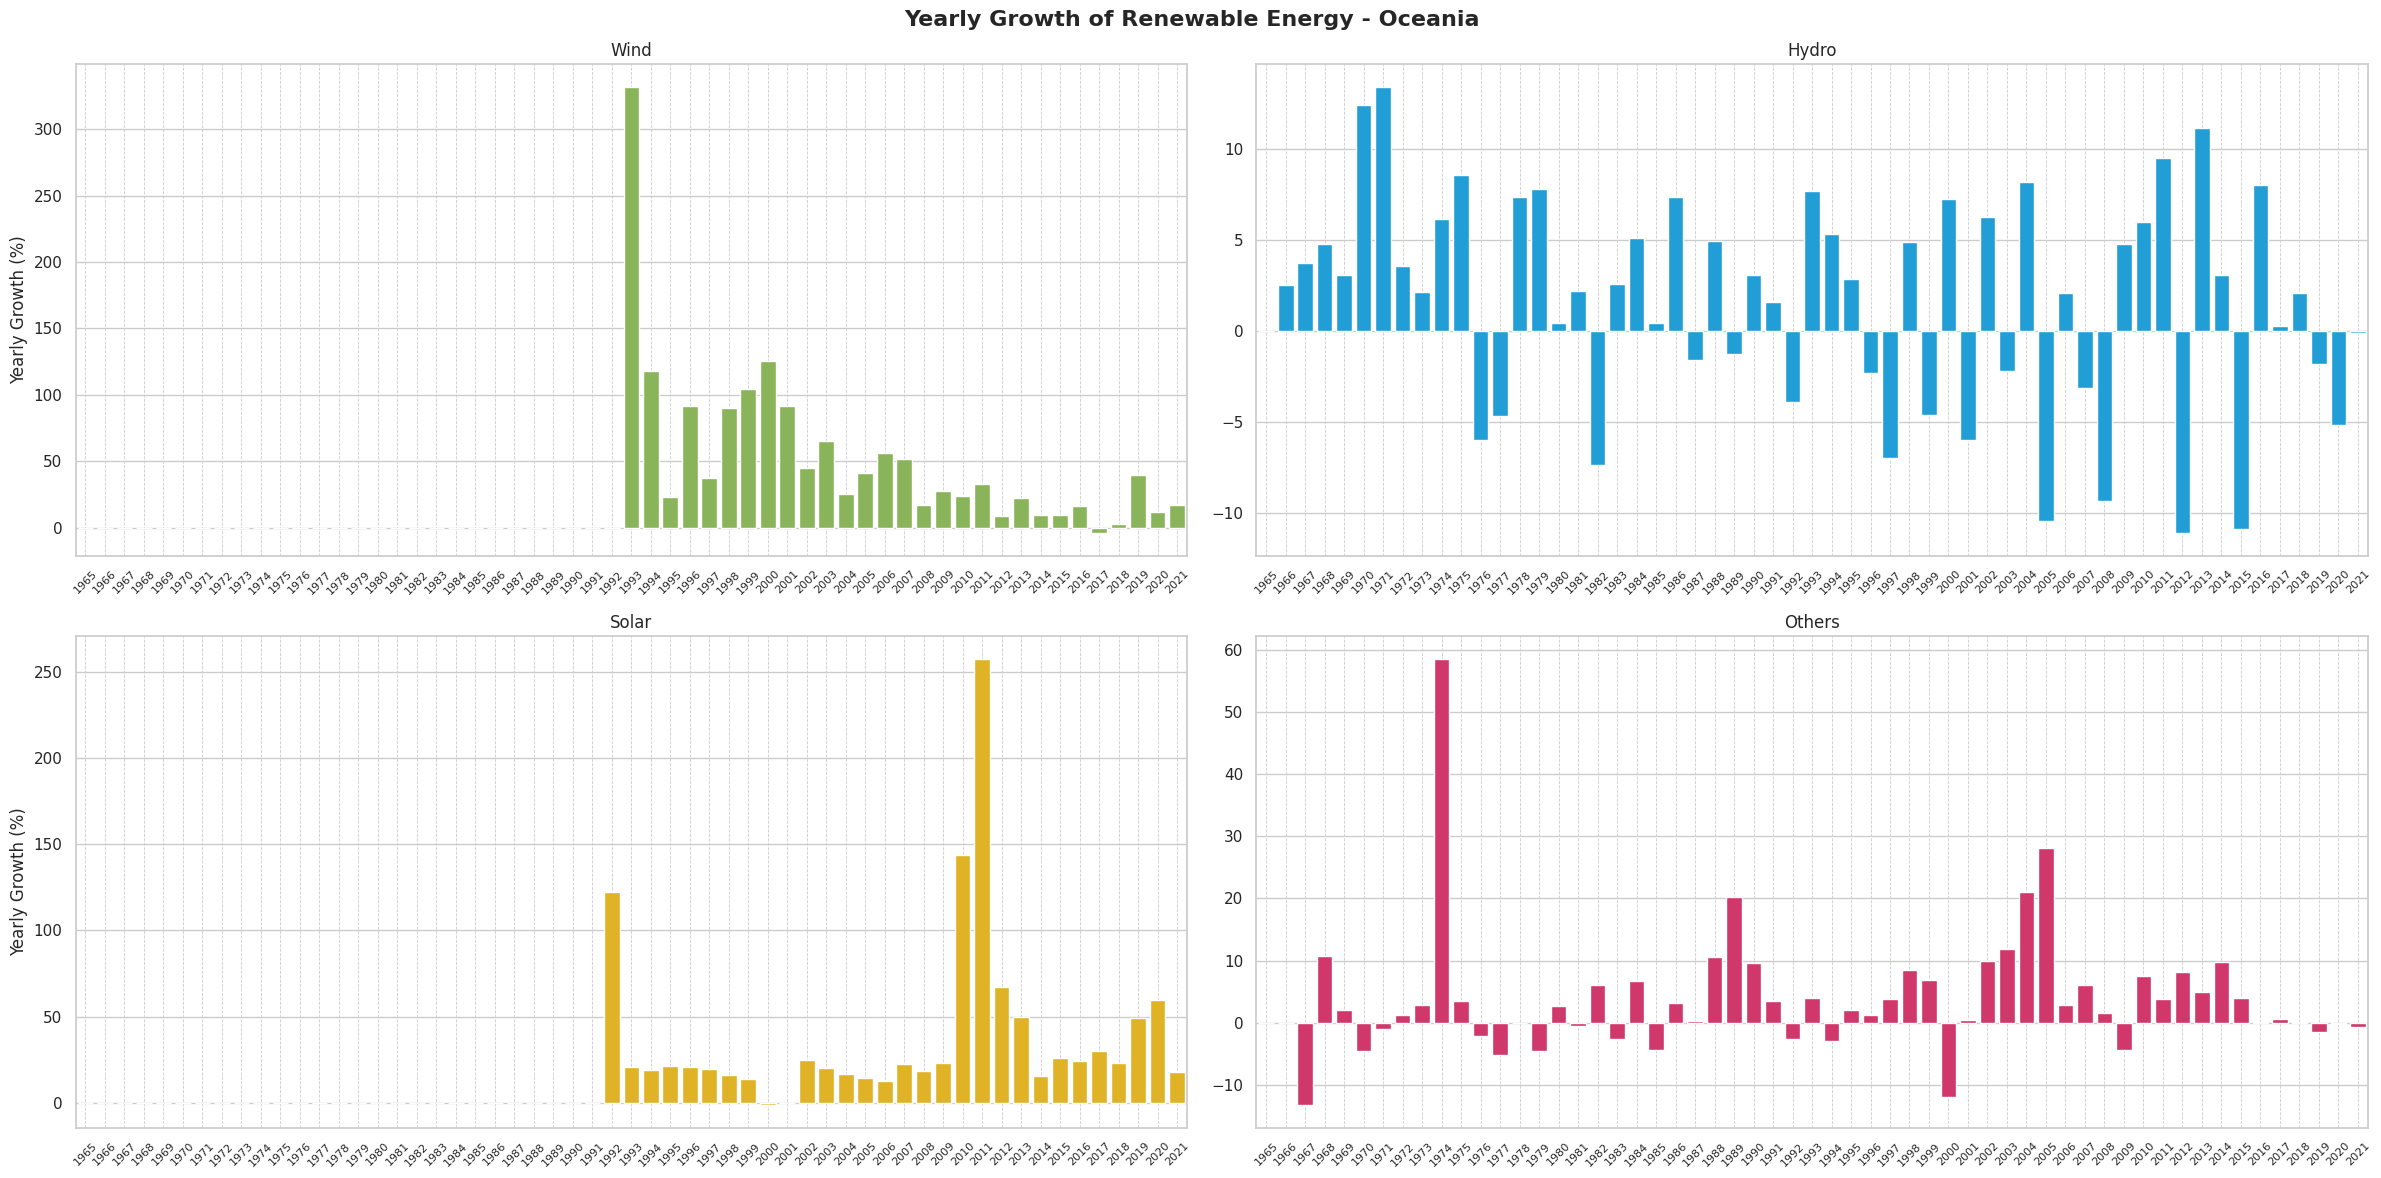

In [98]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# Filtrando os dados para o continente Oceania
df_europe_growth = df_growth[df_growth['Continent'] == 'Oceania']


# Chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "Oceania")

1. **Energia Eólica**: começou a ser contabilizada em 1992, apresentando crescimento constante e positivo ao longo dos anos.

2. **Energia Hidrelétrica**: assim como em outros continentes, com exceção da África, a geração de energia hidrelétrica é bastante influenciada por condições climáticas, especialmente por períodos de seca.

3. **Energia Solar**: seguindo uma tendência de crescimento positivo desde 1992, a geração de energia solar registrou uma exceção nos anos de 1999 e 2000, quando houve uma queda.

4. **Outras Renováveis**: a geração de energia por outras fontes renováveis tem mostrado grande oscilação ao longo do tempo.


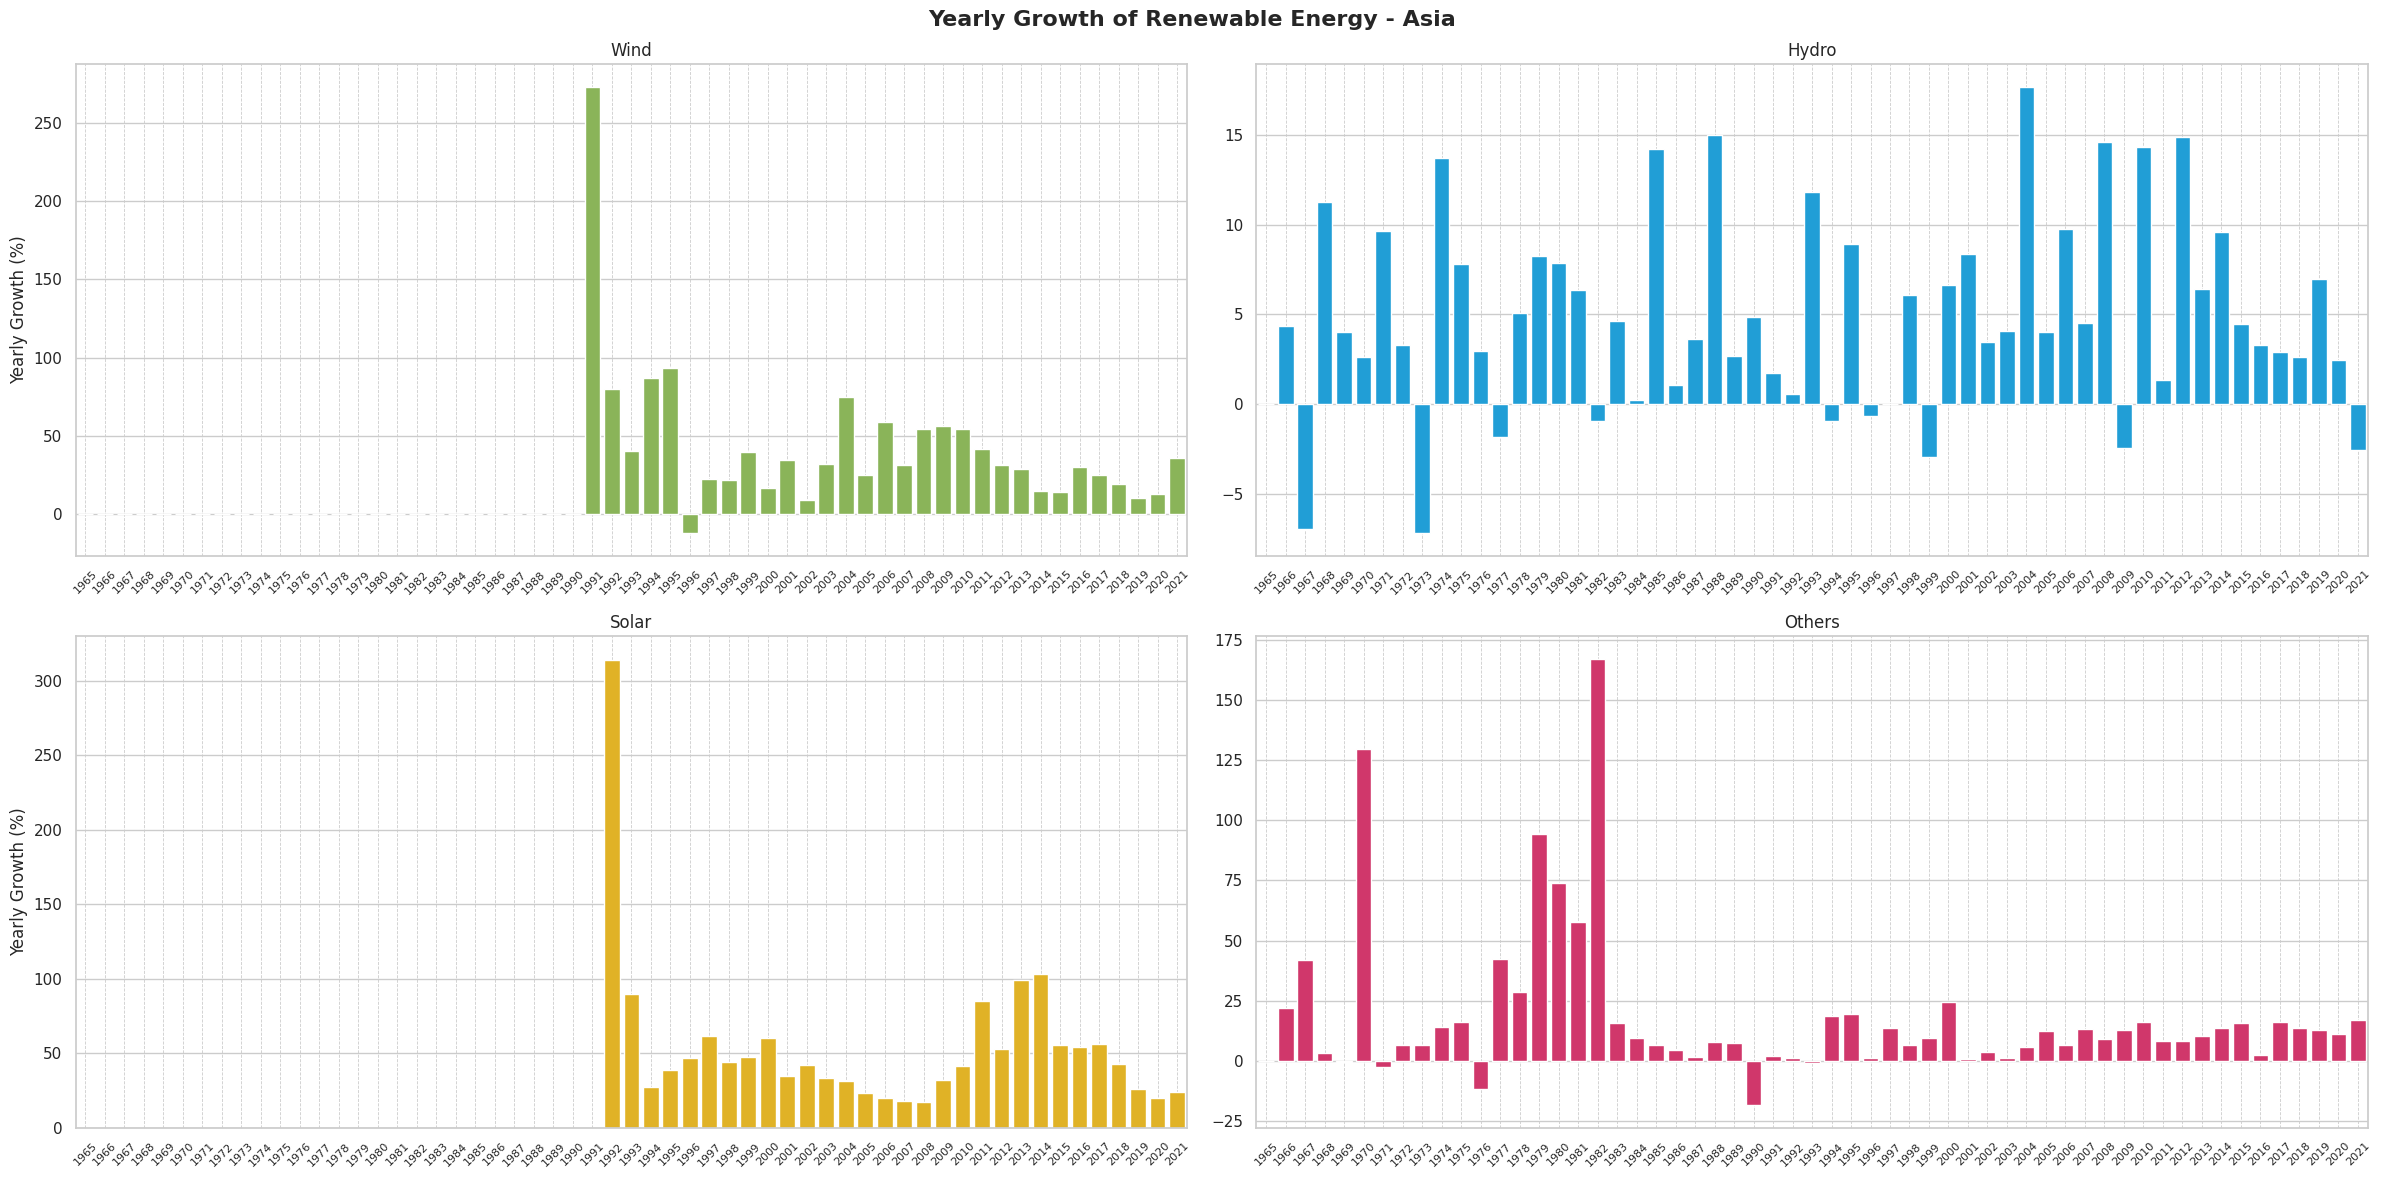

In [99]:
# estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)  # ajustando o tamanho da figura para maior espaçamento e visualizar melhor o ano

# Filtrando os dados para o continente Asia
df_europe_growth = df_growth[df_growth['Continent'] == 'Asia']


# Chamando a função para visualizar os gráficos
plot_all_growth(df_europe_growth, "Asia")

1. **Energia Eólica**: introduzida na matriz energética da Ásia em 1991, a energia eólica apresentou crescimento positivo ao longo dos anos, com exceção de uma queda em 1996.

2. **Energia Hidrelétrica**: embora tenha havido alguns períodos de declínio na geração hidrelétrica, o crescimento foi predominantemente positivo, indicando que as condições climáticas impactaram pouco a geração de energia hidrelétrica na Ásia.

3. **Energia Solar**: desde o início da geração de energia solar em 1992, o crescimento foi consistentemente positivo todos os anos.

4. **Outras Renováveis**: a geração de energia por outras fontes renováveis também apresentou crescimento positivo, mas há indícios de que esteja perdendo espaço para as energias eólica e solar.

##Conclusão:


De 1965 a 2022, a geração de energia renovável ao redor do mundo apresentou tendências variadas entre as principais regiões, com destaque para o crescimento das energias solar e eólica. Na África e na América do Sul, esses continentes demonstram grande potencial para expandir suas matrizes energéticas com essas fontes renováveis. Investimentos em infraestrutura e tecnologia podem acelerar a transição energética nessas regiões, oferecendo soluções sustentáveis a longo prazo.

Analisando por tipo de energia renovável:

*   *Energia eólica* começou a ser contabilizada em várias regiões a partir dos anos 1990, com destaque para o crescimento positivo na Ásia desde 1991 e na América do Sul a partir de 1997, com algumas oscilações pontuais. Na África, o maior avanço ocorreu em 2000, sugerindo a instalação de novas turbinas. De maneira geral, a energia eólica manteve um crescimento constante em todas as regiões analisadas.

*   *Energia hidrelétrica*, embora muito influenciada por fatores climáticos, como secas, especialmente na América do Sul e em continentes como a Ásia, apresentou um comportamento mais estável na África, onde as condições climáticas impactaram menos a geração. No entanto, globalmente, essa fonte de energia mostrou oscilações mais frequentes em comparação com as demais renováveis.

*  *Energia solar* teve um crescimento expressivo em todas as regiões, destacando-se a América do Sul, onde o maior avanço ocorreu em 2000. Na Ásia, essa fonte de energia mostrou crescimento constante desde o início de sua utilização em 1992. Esse padrão de crescimento positivo reflete o forte potencial dessa tecnologia, que, assim como a eólica, desempenha um papel importante na transição energética.

* *Outras fontes renováveis* mostraram oscilações significativas em todas as regiões, com destaque para a América do Sul, que registrou estabilidade e picos em anos como 1970, e para a Ásia, onde há indicativos de que essas fontes podem estar perdendo espaço para a energia solar e eólica.


Na Europa e na América do Norte, a diversificação das fontes de energia renovável já é bem estabelecida. No entanto, ambas as regiões ainda podem explorar fontes alternativas para aumentar sua capacidade de geração sustentável.

Com o agravamento das mudanças climáticas, é muito importante acelerar a transição para as energias renováveis a fim de reduzir as emissões de carbono e mitigar os impactos no clima global. Ações coordenadas entre governos e o setor privado podem impulsionar essa transição em escala global. Expandir o uso de fontes renováveis, principalmente em regiões como a África, que possuem grande potencial ainda inexplorado, será fundamental para atender às crescentes demandas energéticas de forma sustentável e combater o avanço das mudanças climáticas.






